# 星火预习题目

⛔️ 内部资料，严禁转发

可通过[Tensorcircuit官方文档](https://tensorcircuit.readthedocs.io)等来源查询并学习包括符号意义、API使用方法等信息。

1-4 的题目最好在正式参与星火活动前完成，有余力这也可以尝试选做题。

## 1 环境配置

配置一个支持 Python 的环境和相应的 Python 软件包，使得至少可以跑通如下代码：

2025-07-01 11:14:20.386716: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-01 11:14:20.387499: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-01 11:14:20.390711: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-01 11:14:20.397987: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751339660.409148   49052 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751339660.41

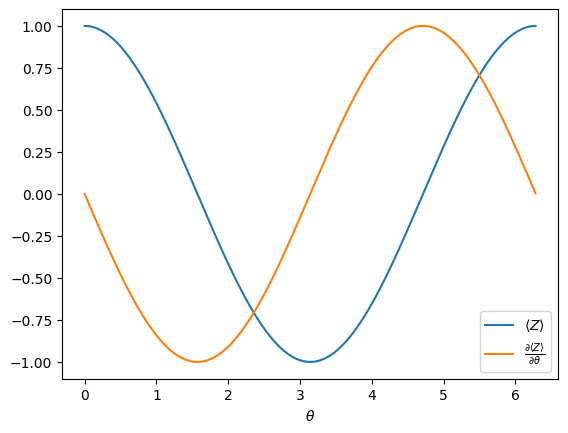

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import tensorcircuit as tc

K = tc.set_backend("tensorflow")


@K.jit
def exp_z(param):
    c = tc.Circuit(1)
    c.rx(0, theta=param)
    return K.real(c.expectation_ps(z=[0]))


grad_z = K.grad(exp_z)

params = K.convert_to_tensor(np.arange(0, 2 * np.pi, 0.01))

plt.plot(params, [exp_z(param) for param in params], label=r"$\langle Z\rangle$")
plt.plot(
    params,
    [grad_z(param) for param in params],
    label=r"$\frac{\partial \langle Z\rangle}{\partial \theta}$",
)
plt.legend()
plt.xlabel(r"$\theta$")
plt.show()

## 2 向量和矩阵

### 2-1 旋转矩阵

考虑初始向量 $ v=(1, 0) $ ，给定二维矩阵 $$R(\theta) = \begin{pmatrix} \cos\theta &\sin\theta \\ -\sin\theta & \cos\theta \end{pmatrix}$$，
利用 Numpy 程序实现矩阵乘向量的计算 $v'=R(\theta)v$。通过可视化找到这一向量变化的几何意义。

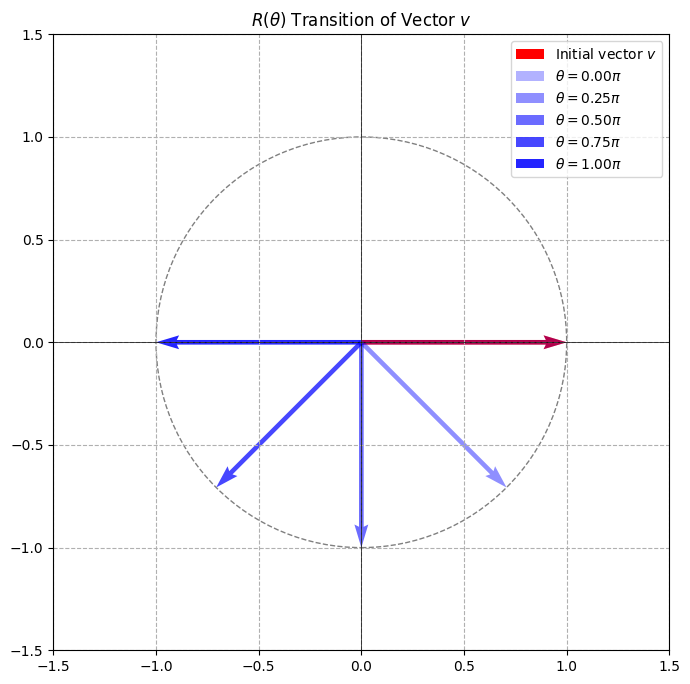

In [2]:
# 1. 定义初始向量
v = np.array([1, 0])

# 2. 定义旋转矩阵 R(theta)
# 注意：该矩阵 R(theta) = [[cos, sin], [-sin, cos]] 执行顺时针旋转
def R(theta):
    return np.array([
        [np.cos(theta), np.sin(theta)],
        [-np.sin(theta), np.cos(theta)]
    ])

# 3. 设置多个角度进行可视化，以更好地观察其几何意义
thetas = np.linspace(0, np.pi, 5)

# 4. 可视化
plt.figure(figsize=(8, 8))
ax = plt.gca()

# 绘制原始向量
ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='r', label=r'Initial vector $v$')

# 计算并绘制旋转后的向量
for i, theta in enumerate(thetas):
    v_prime = R(theta) @ v
    ax.quiver(0, 0, v_prime[0], v_prime[1], angles='xy', scale_units='xy', scale=1, color='b', alpha=0.3 + 0.7 * i / len(thetas), label=f'$\\theta={theta/np.pi:.2f}\\pi$')

# 绘制一个单位圆作为参考
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
ax.add_artist(circle)

# 设置图表属性
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_aspect('equal', adjustable='box')
ax.grid(True, linestyle='--')
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
plt.title(r'$R(\theta)$ Transition of Vector $v$')
plt.legend()
plt.show()

# 几何意义：
# 从图中可以看出，矩阵 R(theta) 将初始向量 v=(1,0) 沿着单位圆进行了顺时针旋转，旋转角度为 theta。
# 变换后的向量 v' 的终点坐标为 (cos(theta), -sin(theta))。

### 2-2 矩阵指数

理解矩阵指数的含义，程序实现 $e^{i \hat P}$, $\hat{P}=\sigma_x, \sigma_y, \sigma_y$. $\sigma_x, \sigma_y, \sigma_y$ 是 $2*2$ 泡利矩阵。

考虑泰勒级数展开，试证明 $e^{i\theta\hat{P}} = \cos(\theta) I + \mathrm{i}\sin(\theta) \hat{P}$，并程序验证该公式的正确性。

根据解析证明，讨论以上矩阵欧拉公式成立对矩阵 $\hat{P}$ 形式的限制。

##### Proof:

By the Taylor series expansion of exponential function, we have:
$$
e^{A} = I + A + \frac{A^2}{2!} + \frac{A^3}{3!} + \cdots.
$$
According to the properties of Pauli matrices, we know that:
$$
\sigma_x^2 = I, \quad \sigma_y^2 = I, \quad \sigma_z^2 = I.
$$
Thus, we can compute the exponential of Pauli matrices as follows:
\begin{align*}
    e^{i\theta\hat{P}}&=I+\mathrm{i}\theta\hat{P}-\frac{\theta^2}{2!}I-\frac{\mathrm{i}\theta^3}{3!}\hat{P}+\frac{\theta^4}{4!}I+\cdots \\
    &=(1-\frac{\theta^2}{2!}+\frac{\theta^4}{4!}-\cdots)I + \mathrm{i}\theta(\hat{P}-\frac{\theta^2}{3!}\hat{P}+\frac{\theta^4}{5!}\hat{P}-\cdots) \\
    &=\cos(\theta)I+\mathrm{i}\sin(\theta)\hat{P}.
\end{align*}

The requirement for the matrix $\hat{P}$ is that it must be involutory, i.e., $\hat{P}^2=I$.

In [3]:
import numpy as np
from scipy.linalg import expm # 导入 SciPy 的矩阵指数函数

# 定义泡利矩阵和单位矩阵，统一使用 complex 类型
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I = np.eye(2, dtype=complex)

pauli_matrices = {
    "sigma_x": sigma_x,
    "sigma_y": sigma_y,
    "sigma_z": sigma_z,
}

# 设置一个随机的 theta 值进行验证
theta = np.random.rand() * 2 * np.pi
print(f"使用 theta = {theta:.4f} 进行验证\n")

# 对每个泡利矩阵进行验证
for name, P in pauli_matrices.items():

    # 1. LHS: 使用 SciPy 计算 e^(i*theta*P)
    # expm 函数计算矩阵指数
    lhs = expm(1j * theta * P)

    # 2. RHS: 使用欧拉公式 cos(theta)*I + i*sin(theta)*P
    rhs = np.cos(theta) * I + 1j * np.sin(theta) * P

    # 3. 验证 LHS 和 RHS 是否相等
    print(f"--- 验证 {name} ---")
    print("LHS (来自 scipy.linalg.expm):")
    print(np.round(lhs, 4))
    print("\nRHS (来自欧拉公式):")
    print(np.round(rhs, 4))
    
    is_correct = np.allclose(lhs, rhs)
    print(f"\n公式对 {name} 是否成立? {is_correct}")
    print("-" * 20 + "\n")

使用 theta = 5.8742 进行验证

--- 验证 sigma_x ---
LHS (来自 scipy.linalg.expm):
[[0.9175+0.j     0.    -0.3977j]
 [0.    -0.3977j 0.9175+0.j    ]]

RHS (来自欧拉公式):
[[0.9175+0.j     0.    -0.3977j]
 [0.    -0.3977j 0.9175+0.j    ]]

公式对 sigma_x 是否成立? True
--------------------

--- 验证 sigma_y ---
LHS (来自 scipy.linalg.expm):
[[ 0.9175+0.j -0.3977+0.j]
 [ 0.3977+0.j  0.9175+0.j]]

RHS (来自欧拉公式):
[[ 0.9175+0.j -0.3977+0.j]
 [ 0.3977+0.j  0.9175+0.j]]

公式对 sigma_y 是否成立? True
--------------------

--- 验证 sigma_z ---
LHS (来自 scipy.linalg.expm):
[[0.9175-0.3977j 0.    +0.j    ]
 [0.    +0.j     0.9175+0.3977j]]

RHS (来自欧拉公式):
[[0.9175-0.3977j 0.    +0.j    ]
 [0.    +0.j     0.9175+0.3977j]]

公式对 sigma_z 是否成立? True
--------------------



### 2-3 矩阵关于向量的期望

定义矩阵 $\hat{Q}$ 关于列向量 $v$ 的期望为以下标量：$$v^\dagger \hat{Q} v$$。
考虑 $v(\theta)=e^{i\theta/2\hat{P}}v_0$, $v_0=(1, 0)$, 且 $\hat{P}, \hat{Q}$ 均是泡利矩阵，实现程序计算该期望。

函数前两个输入为 0,1,2 之一的整数，分别确定 P 和 Q 是哪一个泡利矩阵，第三个输入为参数浮点数 $\theta$, 函数的输出为$\hat{Q}$在$\hat{v}$上的期望值。

可视化出不同泡利矩阵组合下期望随参数$\theta$变化的曲线，讨论其规律。

- Calculation

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# --- 定义基本矩阵和向量 ---
# 泡利矩阵
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
# 单位矩阵
I = np.eye(2, dtype=complex)
# 初始向量 v0 = |0>
v0 = np.array([[1], [0]], dtype=complex)

# 将矩阵放入列表中，方便索引
pauli_list = [sigma_x, sigma_y, sigma_z]

def calculate_expectation_numpy(p_index: int, q_index: int, theta: float) -> float:
    """
    使用 NumPy 计算期望值 <v(theta)|Q|v(theta)>.

    :param p_index: 确定 P 矩阵的索引 (0: X, 1: Y, 2: Z)
    :param q_index: 确定 Q 矩阵的索引 (0: X, 1: Y, 2: Z)
    :param theta: 旋转角度
    :return: 期望值 (浮点数)
    """
    # 根据索引选择 P 和 Q 矩阵
    P = pauli_list[p_index]
    Q = pauli_list[q_index]

    # 1. 计算旋转矩阵 U = exp(i*theta/2*P)
    # 使用已证明的欧拉公式 e^(i*a*P) = cos(a)*I + i*sin(a)*P
    # 这里 a = theta / 2
    angle = theta / 2
    U = np.cos(angle) * I + 1j * np.sin(angle) * P

    # 2. 计算旋转后的向量 v(theta) = U * v0
    v_theta = U @ v0

    # 3. 计算期望值 v(theta)^dagger * Q * v(theta)
    # v.conj().T 是计算共轭转置 (dagger)
    expectation_value = v_theta.conj().T @ Q @ v_theta

    # 期望值是一个 1x1 的矩阵，如 [[value]]，我们提取其数值
    # 对于厄米算符，期望值必为实数
    return np.real(expectation_value[0, 0])

def interactive_calculation():
    """
    通过用户输入获取参数并计算期望值。
    """
    pauli_names = ['X', 'Y', 'Z']
    
    # 获取 P 矩阵的索引
    while True:
        try:
            p_idx = int(input("请输入 P 矩阵的索引 (0 for X, 1 for Y, 2 for Z): "))
            if p_idx in [0, 1, 2]:
                break
            else:
                print("无效的索引，请输入 0, 1, 或 2。")
        except ValueError:
            print("无效的输入，请输入一个整数。")

    # 获取 Q 矩阵的索引
    while True:
        try:
            q_idx = int(input("请输入 Q 矩阵的索引 (0 for X, 1 for Y, 2 for Z): "))
            if q_idx in [0, 1, 2]:
                break
            else:
                print("无效的索引，请输入 0, 1, 或 2。")
        except ValueError:
            print("无效的输入，请输入一个整数。")

    # 获取 theta 的值
    while True:
        try:
            theta_val_str = input("请输入 theta 的值 (例如, 3.14159): ")
            theta_val = float(theta_val_str)
            break
        except ValueError:
            print("无效的输入，请输入一个浮点数。")
            
    # 调用函数进行计算
    result = calculate_expectation_numpy(p_idx, q_idx, theta_val)
    
    # 打印结果
    print("\n--- 计算结果 ---")
    print(f"P = {pauli_names[p_idx]}, Q = {pauli_names[q_idx]}, theta = {theta_val:.4f}")
    print(f"期望值 <v(theta)|Q|v(theta)> = {result:.6f}")

# 运行交互式计算
interactive_calculation()


--- 计算结果 ---
P = X, Q = Y, theta = -1.5700
期望值 <v(theta)|Q|v(theta)> = -1.000000


- Visualization

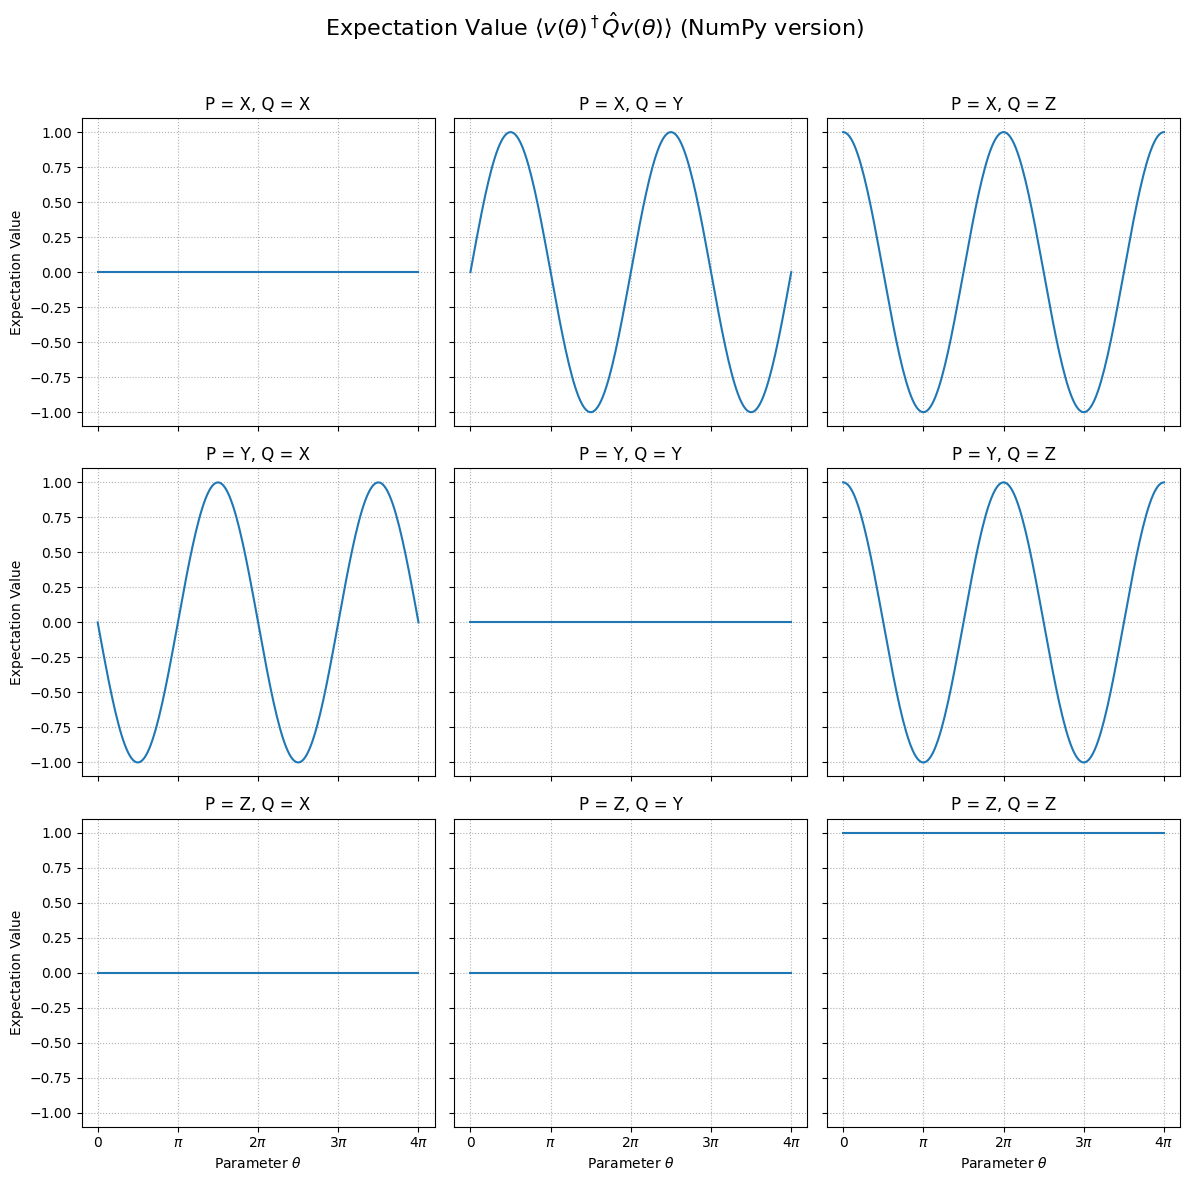

In [5]:
# 可视化不同泡利矩阵组合下期望随参数 theta 变化的曲线

pauli_names = ['X', 'Y', 'Z']
thetas = np.linspace(0, 4 * np.pi, 200)

fig, axs = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)
fig.suptitle(r'Expectation Value $\langle v(\theta)^\dagger \hat{Q} v(\theta) \rangle$ (NumPy version)', fontsize=16)

for p_idx in range(3):
    for q_idx in range(3):
        ax = axs[p_idx, q_idx]
        
        # 计算每个 theta 对应的期望值
        exp_values = [calculate_expectation_numpy(p_idx, q_idx, t) for t in thetas]
        
        # 绘图
        ax.plot(thetas, exp_values, label=f'P={pauli_names[p_idx]}, Q={pauli_names[q_idx]}')
        ax.set_title(f'P = {pauli_names[p_idx]}, Q = {pauli_names[q_idx]}')
        ax.grid(True, linestyle=':')
        ax.set_xticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi])
        ax.set_xticklabels(['0', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$'])

# 设置坐标轴标签
for i in range(3):
    axs[i, 0].set_ylabel('Expectation Value')
    axs[2, i].set_xlabel(r'Parameter $\theta$')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 规律讨论：
# (此部分讨论与 TensorCircuit 版本完全相同，因为底层的数学原理是一致的)
# 从上面的9个图中，我们可以观察到清晰的规律，这些规律源于泡利矩阵的代数性质。
# 期望值 E(theta) = <0|exp(-i*theta/2*P) Q exp(i*theta/2*P)|0>。
#
# 1. 对角线情况 (P = Q):
#    - 当 P = Q = X 或 Y 时，E(theta) = <0|X|0> = 0 或 E(theta) = <0|Y|0> = 0。曲线是一条直线。
#    - 当 P = Q = Z 时，旋转操作 exp(i*theta/2*Z) 不会改变|0>态（仅增加一个相位），因此 E(theta) = <0|Z|0> = 1。曲线也是一条直线。
#
# 2. P = Z 的情况:
#    - 当 P=Z 时，旋转 exp(i*theta/2*Z) 作用在 |0> 上只产生一个全局相位，不改变状态本身。
#    - 因此，E(theta) = <0|Q|0>。当 Q=X 或 Q=Y 时，结果为0。当 Q=Z 时，结果为1。这解释了最下面一行的所有图形。
#
# 3. P, Q, R 构成循环置换的情况 (如 P=X, Q=Y):
#    - 期望值呈现 sin(theta) 或 -sin(theta) 的形式。例如，当 P=X, Q=Y 时，E(theta) = sin(theta)。当 P=Y, Q=X 时，E(theta) = -sin(theta)。
#
# 4. 其他非对角线情况 (如 P=X, Q=Z):
#    - 期望值呈现 cos(theta) 的形式。例如，当 P=X, Q=Z 时，E(theta) = cos(theta)。
#
# 总结：曲线的行为由 P 和 Q 的对易关系 ([P, Q]) 和反对易关系 ({P, Q}) 唯一确定。这些关系是量子力学和量子计算中旋转操作的基础。

### 2-4 张量积

理解矩阵张量积的含义，$X\otimes I\otimes I\otimes Z$ 可简记为 $X_0Z_3$。
程序生成如下矩阵（输入 n）：

$$H = \sum_{i=0}^{n-1} Z_i\otimes I_{n-i-1} + \sum_{i=0}^{n-2} X_i\otimes I_{n-i-1}X_{i+1}\otimes I_{n-i} ,$$

并求该矩阵 $H$ 在向量 $(1,0,0,....)$ 下的期望值。

In [7]:
import numpy as np
from functools import reduce

def generate_H_and_exp(n: int):
    """
    生成指定大小 n 的哈密顿量 H，并计算其在 |0...0> 态下的期望值。

    :param n: 量子比特的数量 (系统的尺寸)
    :return: 一个元组 (H, expectation_value)，其中 H 是 (2^n, 2^n) 的 NumPy 数组，
             expectation_value 是一个浮点数。
    """
    if n < 1:
        raise ValueError("n 必须是大于等于1的整数")

    # 定义基本矩阵
    I = np.eye(2, dtype=complex)
    X = np.array([[0, 1], [1, 0]], dtype=complex)
    Z = np.array([[1, 0], [0, -1]], dtype=complex)

    # 初始化哈密顿量 H 为零矩阵
    dim = 2**n
    H = np.zeros((dim, dim), dtype=complex)

    # 1. 计算第一项: sum_{i=0}^{n-1} Z_i
    for i in range(n):
        # 创建一个算符列表，在第 i 个位置放置 Z，其余为 I
        ops_list = [I] * n
        ops_list[i] = Z
        # 使用 np.kron 计算张量积
        term = reduce(np.kron, ops_list)
        H += term

    # 2. 计算第二项: sum_{i=0}^{n-2} X_i X_{i+1}
    # 这一项只在 n > 1 时存在
    if n > 1:
        for i in range(n - 1):
            # 创建一个算符列表，在 i 和 i+1 位置放置 X
            ops_list = [I] * n
            ops_list[i] = X
            ops_list[i+1] = X
            # 计算张量积并加到 H 上
            term = reduce(np.kron, ops_list)
            H += term
            
    # 3. 计算期望值
    # 向量 (1,0,0,....) 是 |0...0> 态
    # 期望值 <0...0|H|0...0> 就是 H 矩阵的左上角第一个元素 H[0, 0]
    expectation_value = H[0, 0].real

    return H, expectation_value

# --- 使用示例 ---
try:
    n_qubits = int(input("请输入量子比特数 n (建议 n <= 4 以便显示): "))
    
    H_matrix, exp_val = generate_H_and_exp(n_qubits)
    
    print(f"\n对于 n = {n_qubits}:")
    if n_qubits <= 3: # 矩阵太大时不易阅读
        print("生成的哈密顿量 H:")
        print(np.round(H_matrix.real, 2))
    else:
        print(f"生成的哈密顿量 H 维度为: {H_matrix.shape}")

    print(f"\n矩阵 H 在向量 (1,0,0,....) 下的期望值为: {exp_val}")

    # 理论分析：
    # <0...0|Z_i|0...0> = 1
    # <0...0|X_i X_{i+1}|0...0> = <0|X|0><0|X|0> = 0 * 0 = 0
    # 所以理论期望值 = n * 1 + (n-1) * 0 = n
    print(f"理论期望值为: {float(n_qubits)}")

except (ValueError, TypeError) as e:
    print(f"输入错误: {e}")



对于 n = 5:
生成的哈密顿量 H 维度为: (32, 32)

矩阵 H 在向量 (1,0,0,....) 下的期望值为: 5.0
理论期望值为: 5.0


### 2-5 狄拉克符号

记列向量 $\vert 0\rangle = \begin{pmatrix}1\\0 \end{pmatrix}$, $\vert 1\rangle = \begin{pmatrix}0\\1 \end{pmatrix}$, $\vert 00\rangle = \begin{pmatrix}1\\0\\0\\0 \end{pmatrix}$，尝试用 Dirac 符号的语言，重写上述小节涉及的矩阵关系和定义式。并写出 $\frac{1}{\sqrt{2}}(\vert 010\rangle -\vert 101\rangle)$ 代表的列向量。

##### Solution:

$$
H = \sum_{i=0}^{n-1} Z_i + \sum_{i=0}^{n-2} X_iX_{i+1}.
$$

Since
$$
Z_i = \vert 0\rangle_i\langle 0\vert - \vert 1\rangle_i\langle 1\vert, \quad X_i = \vert 0\rangle_i\langle 1\vert + \vert 1\rangle_i\langle 0\vert,
$$
the Hamiltonian can be rewritten as:
$$
H=\sum_{i=0}^{n-1} (\vert 0\rangle_i\langle 0\vert - \vert 1\rangle_i\langle 1\vert) + \sum_{i=0}^{n-2} (\vert 0\rangle_i\langle 1\vert + \vert 1\rangle_i\langle 0\vert)\otimes(\vert 0\rangle_{i+1}\langle 1\vert + \vert 1\rangle_{i+1}\langle 0\vert).
$$
The expectation of $H$ on the state $(1,0,0,\dots)=\vert 00\dots 0\rangle$ is given by:

\begin{align*}
    \langle H \rangle &= \langle 00\dots 0\vert H \vert 00\dots 0\rangle \\
    &= \sum_{i=0}^{n-1} \langle 00\dots 0\vert Z_i \vert 00\dots 0\rangle + \sum_{i=0}^{n-2} \langle 00\dots 0\vert X_iX_{i+1} \vert 00\dots 0\rangle \\
    &=n\times 1+(n-1)\times 0 \\
    &=n.
\end{align*}

$$
\frac{1}{\sqrt{2}}(\vert 010\rangle -\vert 101\rangle) = \frac{1}{\sqrt{2}}\left(\begin{pmatrix}0\\0\\1\\0\\0\\0\\0\\0 \end{pmatrix} - \begin{pmatrix}0\\0\\0\\0\\0\\1\\0\\0 \end{pmatrix}\right) = \frac{1}{\sqrt{2}}\begin{pmatrix}0\\0\\1\\0\\0\\-1\\0\\0 \end{pmatrix}.
$$

### 2-6 使用Tensorcircuit后端

使用`Tensorcircuit`的`Tensorflow`或`JAX`后端API重写本小节（§2）所有题目

提示：可以使用调用后端`K = tc.set_backend("tensorflow")`，具体使用方法可以参考 1-环境配置 与[Tensorcircuit官方文档](https://tensorcircuit.readthedocs.io)

In [8]:
import numpy as np
import tensorcircuit as tc

K = tc.set_backend("tensorflow")

##### 2-2

In [9]:
# 定义泡利矩阵和单位矩阵
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])
I = np.eye(2)

pauli_matrices = {
    "sigma_x": {"matrix": sigma_x, "gate": "rx"},
    "sigma_y": {"matrix": sigma_y, "gate": "ry"},
    "sigma_z": {"matrix": sigma_z, "gate": "rz"},
}

# 设置一个随机的 theta 值进行验证
theta = np.random.rand() * 2 * np.pi
print(f"使用 theta = {theta:.4f} 进行验证\n")

# 对每个泡利矩阵进行验证
for name, info in pauli_matrices.items():
    P = info["matrix"]
    gate_name = info["gate"]

    # 1. LHS: 使用 TensorCircuit 构建 e^(i*theta*P)
    # 注意：tc.gates.rx(theta) = exp(-i*theta/2*X)
    # 所以要得到 exp(i*theta*X)，我们需要使用 rx(-2*theta)
    c = tc.Circuit(1)
    # getattr(c, gate_name) 会调用 c.rx, c.ry 或 c.rz
    getattr(c, gate_name)(0, theta=-2 * theta)
    lhs = c.matrix()

    # 2. RHS: 使用欧拉公式 cos(theta)*I + i*sin(theta)*P
    rhs = np.cos(theta) * I + 1j * np.sin(theta) * P

    # 3. 验证 LHS 和 RHS 是否相等
    print(f"--- 验证 {name} ---")
    print("LHS (来自 TensorCircuit):")
    print(np.round(lhs, 4))
    print("\nRHS (来自欧拉公式):")
    print(np.round(rhs, 4))
    
    is_correct = np.allclose(lhs, rhs)
    print(f"\n公式对 {name} 是否成立? {is_correct}")
    print("-" * 20 + "\n")

使用 theta = 4.2804 进行验证

--- 验证 sigma_x ---
LHS (来自 TensorCircuit):
[[-0.4187+0.j      0.    -0.9081j]
 [ 0.    -0.9081j -0.4187+0.j    ]]

RHS (来自欧拉公式):
[[-0.4187+0.j      0.    -0.9081j]
 [ 0.    -0.9081j -0.4187+0.j    ]]

公式对 sigma_x 是否成立? True
--------------------

--- 验证 sigma_y ---
LHS (来自 TensorCircuit):
[[-0.4187+0.j -0.9081+0.j]
 [ 0.9081+0.j -0.4187+0.j]]

RHS (来自欧拉公式):
[[-0.4187+0.j -0.9081+0.j]
 [ 0.9081+0.j -0.4187+0.j]]

公式对 sigma_y 是否成立? True
--------------------

--- 验证 sigma_z ---
LHS (来自 TensorCircuit):
[[-0.4187-0.9081j  0.    +0.j    ]
 [ 0.    +0.j     -0.4187+0.9081j]]

RHS (来自欧拉公式):
[[-0.4187-0.9081j  0.    +0.j    ]
 [ 0.    +0.j     -0.4187+0.9081j]]

公式对 sigma_z 是否成立? True
--------------------



##### 2-3

- Calculation

In [10]:
import matplotlib.pyplot as plt

def calculate_expectation(p_index: int, q_index: int, theta: float) -> float:
    """
    计算期望值 <v(theta)|Q|v(theta)>.

    :param p_index: 确定 P 矩阵的索引 (0: X, 1: Y, 2: Z)
    :param q_index: 确定 Q 矩阵的索引 (0: X, 1: Y, 2: Z)
    :param theta: 旋转角度
    :return: 期望值 (浮点数)
    """
    # 将索引映射到 TensorCircuit 的门和期望算符
    # P 矩阵决定了旋转门
    p_gate_map = {0: "rx", 1: "ry", 2: "rz"}
    # Q 矩阵决定了测量基
    q_measure_map = {0: {"x": [0]}, 1: {"y": [0]}, 2: {"z": [0]}}

    p_gate_name = p_gate_map[p_index]
    q_expectation_args = q_measure_map[q_index]

    # 构建量子线路
    c = tc.Circuit(1)  # 包含1个量子比特的线路，初始状态为 |0>

    # 应用旋转门 U = exp(i*theta/2*P)
    # 注意 tc.rx(phi) = exp(-i*phi/2*X)，为了得到 exp(i*theta/2*P)
    # 我们需要传入角度 -theta
    getattr(c, p_gate_name)(0, theta=-theta)

    # 计算期望值 <Q>
    # 这等价于计算 <0| U_dagger Q U |0>
    expectation_value = c.expectation_ps(**q_expectation_args)

    # 返回实部结果
    return K.real(expectation_value)

def interactive_calculation():
    """
    通过用户输入获取参数并计算期望值。
    """
    pauli_names = ['X', 'Y', 'Z']
    
    # 获取 P 矩阵的索引
    while True:
        try:
            p_idx = int(input("请输入 P 矩阵的索引 (0 for X, 1 for Y, 2 for Z): "))
            if p_idx in [0, 1, 2]:
                break
            else:
                print("无效的索引，请输入 0, 1, 或 2。")
        except ValueError:
            print("无效的输入，请输入一个整数。")

    # 获取 Q 矩阵的索引
    while True:
        try:
            q_idx = int(input("请输入 Q 矩阵的索引 (0 for X, 1 for Y, 2 for Z): "))
            if q_idx in [0, 1, 2]:
                break
            else:
                print("无效的索引，请输入 0, 1, 或 2。")
        except ValueError:
            print("无效的输入，请输入一个整数。")

    # 获取 theta 的值
    while True:
        try:
            theta_val_str = input("请输入 theta 的值 (例如, 3.14159): ")
            theta_val = float(theta_val_str)
            break
        except ValueError:
            print("无效的输入，请输入一个浮点数。")
            
    # 调用函数进行计算
    result = calculate_expectation_numpy(p_idx, q_idx, theta_val)
    
    # 打印结果
    print("\n--- 计算结果 ---")
    print(f"P = {pauli_names[p_idx]}, Q = {pauli_names[q_idx]}, theta = {theta_val:.4f}")
    print(f"期望值 <v(theta)|Q|v(theta)> = {result:.6f}")

# 运行交互式计算
interactive_calculation()


--- 计算结果 ---
P = X, Q = Y, theta = -1.5700
期望值 <v(theta)|Q|v(theta)> = -1.000000


- Visualization

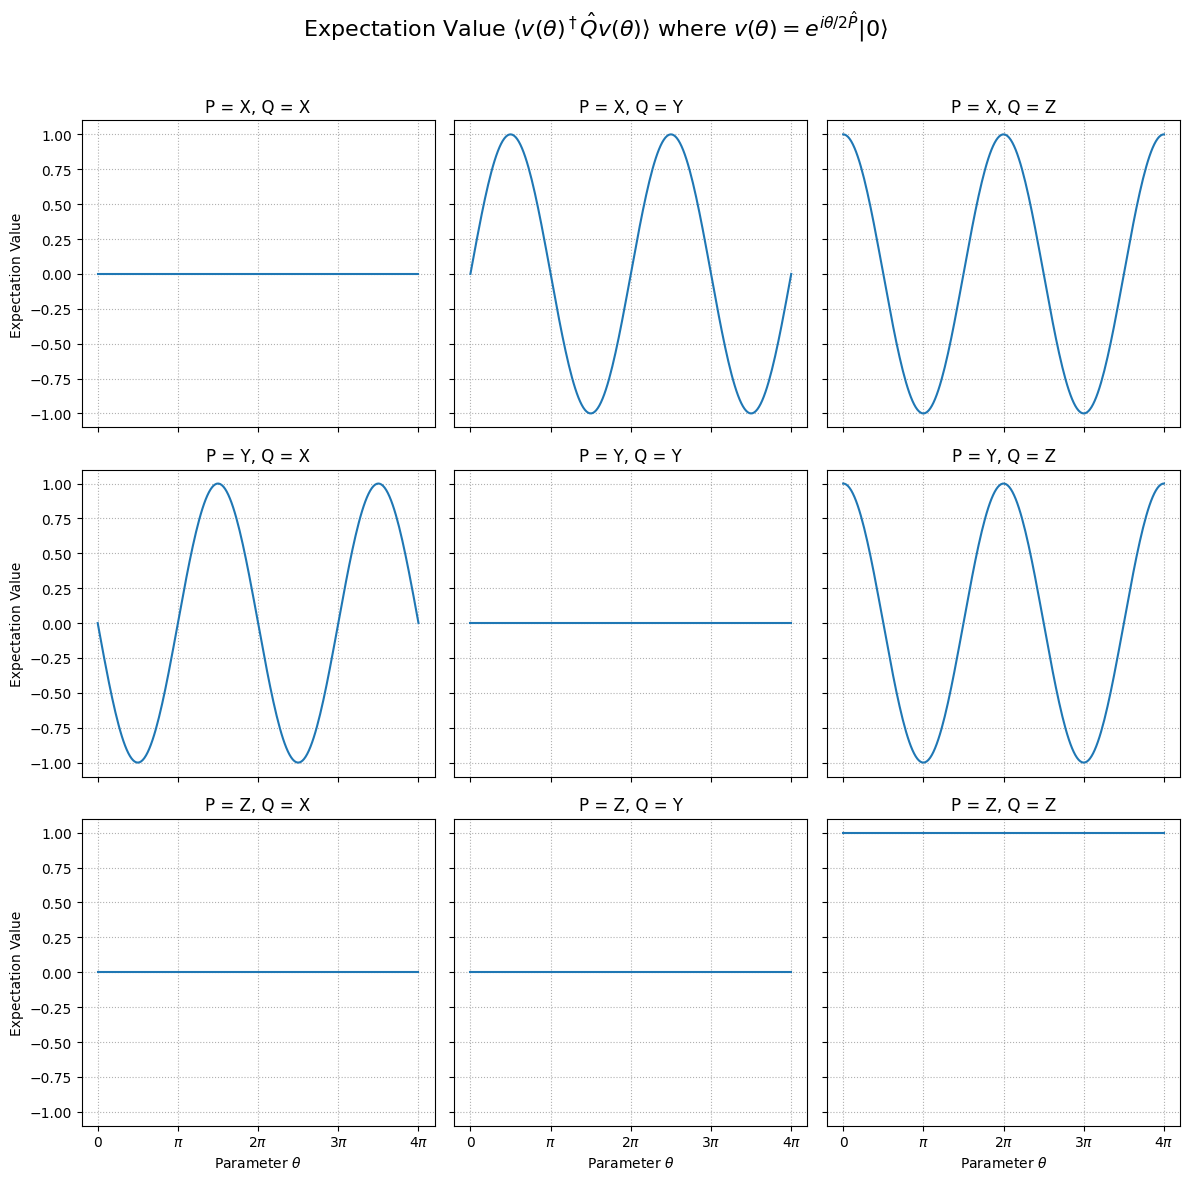

In [11]:
# 可视化不同泡利矩阵组合下期望随参数 theta 变化的曲线

pauli_names = ['X', 'Y', 'Z']
thetas = np.linspace(0, 4 * np.pi, 200)

fig, axs = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)
fig.suptitle(r'Expectation Value $\langle v(\theta)^\dagger \hat{Q} v(\theta) \rangle$ where $v(\theta)=e^{i\theta/2\hat{P}}|0\rangle$', fontsize=16)

for p_idx in range(3):
    for q_idx in range(3):
        ax = axs[p_idx, q_idx]
        
        # 计算每个 theta 对应的期望值
        exp_values = [calculate_expectation(p_idx, q_idx, t) for t in thetas]
        
        # 绘图
        ax.plot(thetas, exp_values, label=f'P={pauli_names[p_idx]}, Q={pauli_names[q_idx]}')
        ax.set_title(f'P = {pauli_names[p_idx]}, Q = {pauli_names[q_idx]}')
        ax.grid(True, linestyle=':')
        ax.set_xticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi])
        ax.set_xticklabels(['0', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$'])

# 设置坐标轴标签
for i in range(3):
    axs[i, 0].set_ylabel('Expectation Value')
    axs[2, i].set_xlabel(r'Parameter $\theta$')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 规律讨论：
# 从上面的9个图中，我们可以观察到清晰的规律，这些规律源于泡利矩阵的代数性质。
# 期望值 E(theta) = <0|exp(-i*theta/2*P) Q exp(i*theta/2*P)|0>。
#
# 1. 对角线情况 (P = Q):
#    - 当 P = Q = X 或 Y 时，E(theta) = <0|X|0> = 0 或 E(theta) = <0|Y|0> = 0。曲线是一条直线。
#    - 当 P = Q = Z 时，旋转操作 exp(i*theta/2*Z) 不会改变|0>态（仅增加一个相位），因此 E(theta) = <0|Z|0> = 1。曲线也是一条直线。
#
# 2. P = Z 的情况:
#    - 当 P=Z 时，旋转 exp(i*theta/2*Z) 作用在 |0> 上只产生一个全局相位，不改变状态本身。
#    - 因此，E(theta) = <0|Q|0>。当 Q=X 或 Q=Y 时，结果为0。当 Q=Z 时，结果为1。这解释了最下面一行的所有图形。
#
# 3. P, Q, R 构成循环置换的情况 (如 P=X, Q=Y):
#    - 期望值呈现 sin(theta) 或 -sin(theta) 的形式。例如，当 P=X, Q=Y 时，E(theta) = sin(theta)。当 P=Y, Q=X 时，E(theta) = -sin(theta)。
#
# 4. 其他非对角线情况 (如 P=X, Q=Z):
#    - 期望值呈现 cos(theta) 的形式。例如，当 P=X, Q=Z 时，E(theta) = cos(theta)。
#
# 总结：曲线的行为由 P 和 Q 的对易关系 ([P, Q]) 和反对易关系 ({P, Q}) 唯一确定。这些关系是量子力学和量子计算中旋转操作的基础。

- 2-4

In [12]:
def generate_H_and_exp_tc(n: int):
    """
    使用 TensorCircuit 生成哈密顿量 H 的矩阵并计算其期望值。

    :param n: 量子比特的数量
    :return: 一个元组 (H, expectation_value)，其中 H 是 (2^n, 2^n) 的 TensorFlow EagerTensor，
             expectation_value 是一个浮点数。
    """
    if n < 1:
        raise ValueError("n 必须是大于等于1的整数")

    pauli_terms = []
    weights = []

    # 第一项: sum_{i=0}^{n-1} Z_i
    for i in range(n):
        term = [0] * n
        term[i] = 3  # Z = 3
        pauli_terms.append(term)
        weights.append(1.0)

    # 第二项: sum_{i=0}^{n-2} X_i X_{i+1}
    for i in range(n - 1):
        term = [0] * n
        term[i] = 1  # X = 1
        term[i + 1] = 1
        pauli_terms.append(term)
        weights.append(1.0)

    # 构造哈密顿量 H 的稠密矩阵
    H_matrix = tc.quantum.PauliStringSum2Dense(pauli_terms, weights, numpy=False)

    # 计算期望值：态为 |00...0>，即在标准基向量中第一个元素
    expectation_value = K.real(H_matrix[0, 0])

    return H_matrix, expectation_value


# --- 使用示例 ---
try:
    n_qubits = int(input("请输入量子比特数 n (建议 n <= 4 以便显示): "))

    H_tc_matrix, exp_val_tc = generate_H_and_exp_tc(n_qubits)

    H_np_matrix = H_tc_matrix.numpy()
    exp_val_np = exp_val_tc.numpy()

    print(f"\n对于 n = {n_qubits}:")
    if n_qubits <= 3:
        print("使用 TensorCircuit 生成的哈密顿量 H:")
        print(np.round(H_np_matrix.real, 2))
    else:
        print(f"生成的哈密顿量 H 维度为: {H_np_matrix.shape}")

    print(f"\n矩阵 H 在向量 |00...0> 下的期望值为: {exp_val_np}")
    print(f"理论期望值为: {float(n_qubits)}")

except (ValueError, TypeError, AttributeError) as e:
    print(f"发生错误: {e}")


I0000 00:00:1751339727.452387   49052 service.cc:152] XLA service 0x3b436830 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751339727.452444   49052 service.cc:160]   StreamExecutor device (0): Host, Default Version
I0000 00:00:1751339727.519735   49052 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



对于 n = 5:
生成的哈密顿量 H 维度为: (32, 32)

矩阵 H 在向量 |00...0> 下的期望值为: 5.0
理论期望值为: 5.0


## 3 导数与梯度下降

### 3-1 数值微分

给定任意计算机函数 ``f``， 其输出是一个数值，输入是一个向量，实现一个函数来计算 ``f`` 关于输入向量各分量的导数。这里可以采用数值差分的方式近似实现，也即 $$(f(x+\delta)-f(x))/\delta$$

In [13]:
import numpy as np

def numerical_gradient(f, x, delta=1e-7):
    """
    使用前向差分法计算函数 f 在点 x 处的数值梯度。
    该实现遵循题目要求的 (f(x+δ)-f(x))/δ 公式。

    :param f: 一个接受向量（NumPy 数组）并返回标量的函数。
    :param x: 计算梯度的点（NumPy 数组）。
    :param delta: 用于差分计算的微小步长。
    :return: 函数 f 在 x 点的梯度（NumPy 数组）。
    """
    # 确保输入 x 是浮点数数组，以防意外的整数运算
    x = np.asarray(x, dtype=float)
    # 初始化梯度向量，其形状与 x 相同
    grad = np.zeros_like(x)
    
    # 计算 f(x) 一次，避免在循环中重复计算
    fx = f(x)

    # 遍历 x 的每个分量来计算偏导数
    for i in range(len(x)):
        # 创建一个 x 的副本用于计算
        x_plus_delta = x.copy()
        # 仅对第 i 个分量进行微小的正向扰动
        x_plus_delta[i] += delta
        
        # 计算 f(x) 在扰动点的值
        fx_plus_delta = f(x_plus_delta)
        
        # 根据前向差分公式计算偏导数
        grad[i] = (fx_plus_delta - fx) / delta
        
    return grad

# --- 使用示例 ---

# 1. 定义一个测试函数 f(v) = v[0]^2 + v[1]^3
def test_function(v):
    return v[0]**2 + v[1]**3

# 2. 定义一个点 x
x_point = np.array([2.0, 3.0])

# 3. 使用我们实现的函数计算数值梯度
numerical_grad = numerical_gradient(test_function, x_point)
print(f"测试函数: f(v) = v[0]^2 + v[1]^3")
print(f"在点 x = {x_point} 处:")
print(f"计算得到的数值梯度为: {numerical_grad}")

# 4. 与解析梯度进行比较以验证正确性
# f 对 v[0] 的偏导是 2*v[0]
# f 对 v[1] 的偏导是 3*v[1]^2
analytical_grad = np.array([2 * x_point[0], 3 * x_point[1]**2])
print(f"理论上的解析梯度为: {analytical_grad}")

# 检查两个结果是否足够接近
assert np.allclose(numerical_grad, analytical_grad)
print("\n验证成功：数值梯度与解析梯度结果非常接近。")

测试函数: f(v) = v[0]^2 + v[1]^3
在点 x = [2. 3.] 处:
计算得到的数值梯度为: [ 4.00000008 27.00000085]
理论上的解析梯度为: [ 4. 27.]

验证成功：数值梯度与解析梯度结果非常接近。


### 3-2 三角函数数值微分

若上述黑盒函数 $f=A\sin(x + B)+C$，通过解析推导找到是否存在严格的数值差分和解析导数相同，也即 $$f'(x) = (f(x+\delta)-f(x-\delta))/\tau$$ 对应的 $\delta, \tau$， 这一方法被称为参数平移。

##### Solution:

$$
f'(x)=A\cos(x+B)=\frac{f(x+\delta)-f(x-\delta)}{\tau}=\frac{A}{\tau}[\sin(x+B+\delta)-\sin(x+B-\delta)]=\frac{2A}{\tau}\cos(x+B)\sin\delta.
$$
It implies that there exists parameters $\delta,\tau$ which satisfies $\tau=2\sin\delta$ such that $f'(x)=(f(x+\delta)-f(x-\delta))/\tau$.

### 3-3 单比特参数平移

若 $f= \langle 0\vert e^{-i\theta/2\hat{P_1}}P_2e^{i\theta/2\hat{P_1}}\vert 0\rangle$，其中$\hat{P_1}, \hat{P_2}$均为泡利矩阵。尝试用数值微分或参数平移的办法估算 f 对 $\theta$ 的导数。此时参数平移法给出的导数是否正确，为什么？

$f(\theta)$ 是否有周期性？请通过数值观察和理论推导，给出 $f(\theta)$ 化简的解析表达式。

##### Solution:

If $\hat{P}_1=\hat{P}_2$, then $f(\theta)=\langle 0 \vert 0 \rangle=1$ and $\frac{\mathrm{d}f(\theta)}{\mathrm{d}\theta}=0$.

If $\hat{P}_1\neq\hat{P}_2$, then we have $\hat{P}_1\hat{P}_2=-\hat{P}_2\hat{P}_1$. The operator can be expressed as:
\begin{align*}
    e^{-i\theta/2\hat{P}_1}\hat{P}_2e^{i\theta/2\hat{P}_1}&=\left(\cos\frac{\theta}{2}-\mathrm{i}\sin\frac{\theta}{2}\hat{P}_1\right)\hat{P}_2\left(\cos\frac{\theta}{2}+\mathrm{i}\sin\frac{\theta}{2}\hat{P}_1\right) \\
    &=\cos^2\frac{\theta}{2}\hat{P}_2-\mathrm{i}\sin\frac{\theta}{2}\cos\frac{\theta}{2}\left[ \hat{P}_1,\hat{P}_2 \right]+\sin^2\frac{\theta}{2}\hat{P}_1\hat{P}_2\hat{P}_1 \\
    &=\cos^2\frac{\theta}{2}\hat{P}_2-\sin^2\frac{\theta}{2}\hat{P}_1^2\hat{P}_2-\mathrm{i}2\sin\frac{\theta}{2}\cos\frac{\theta}{2}\hat{P}_1\hat{P}_2 \\
    &=\cos\theta\hat{P}_2-\mathrm{i}\sin\theta\hat{P}_1\hat{P}_2.
\end{align*}

The the function $f(\theta)$ can be simplified into:
\begin{align*}
    f(\theta)&=\langle 0\vert e^{-i\theta/2\hat{P}_1}\hat{P}_2e^{i\theta/2\hat{P}_1}\vert 0\rangle \\
    &=\langle 0 \vert \hat{P}_2 \vert 0 \rangle\cos\theta-\mathrm{i}\langle 0 \vert \hat{P}_1\hat{P}_2 \vert 0 \rangle\sin\theta.
\end{align*}

It's derivative is:
$$
f'(\theta)=-\langle 0 \vert \hat{P}_2 \vert 0 \rangle\sin\theta-\mathrm{i}\langle 0 \vert \hat{P}_1\hat{P}_2 \vert 0 \rangle\cos\theta.
$$

The function is periodic with period $2\pi$.

### 3-4 梯度下降

梯度下降是优化函数的常见方法。利用前边我们已知的导数求解方案，结合梯度下降的循环并对1.1给出的代码分析，尝试编程（使用`Tensorflow`后端）寻找 1.3.3 中函数 $f$ 的最小值。

--- 开始寻找 P1=X, P2=Y 时 f(theta) 的最小值 ---
Step  20: theta = 0.5668, f(theta) = 0.5843
Step  40: theta = -0.6393, f(theta) = -0.5481
Step  60: theta = -1.5393, f(theta) = -0.9983
Step  80: theta = -1.6859, f(theta) = -0.9928
Step 100: theta = -1.5703, f(theta) = -1.0000

--- 优化完成 ---
找到的最小值点 theta_min: -1.570272
对应的函数最小值 f(theta_min): -0.999995


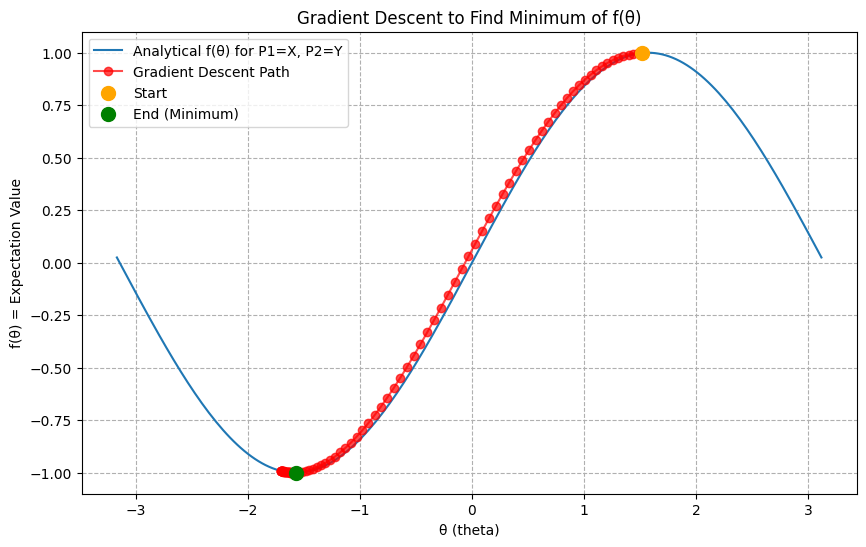

In [15]:
import tensorflow as tf
import numpy as np
import tensorcircuit as tc
from matplotlib import pyplot as plt

# 确保后端是 tensorflow
K = tc.set_backend("tensorflow")

def find_minimum_with_gd(p1_idx: int, p2_idx: int, initial_theta: float = 1.0, learning_rate: float = 0.05, steps: int = 100):
    """
    使用梯度下降寻找 f(theta) 的最小值。

    :param p1_idx: P1 泡利矩阵的索引 (0:X, 1:Y, 2:Z)
    :param p2_idx: P2 泡利矩阵的索引 (0:X, 1:Y, 2:Z)
    :param initial_theta: theta 的初始值
    :param learning_rate: 梯度下降的学习率
    :param steps: 梯度下降的步数
    """
    pauli_names = ['X', 'Y', 'Z']
    print(f"--- 开始寻找 P1={pauli_names[p1_idx]}, P2={pauli_names[p2_idx]} 时 f(theta) 的最小值 ---")

    # 将索引映射到 TensorCircuit 的门和期望算符
    p_gate_map = {0: "rx", 1: "ry", 2: "rz"}
    q_measure_map = {0: {"x": [0]}, 1: {"y": [0]}, 2: {"z": [0]}}
    
    p_gate_name = p_gate_map[p1_idx]
    q_expectation_args = q_measure_map[p2_idx]

    # 定义需要优化的函数 f(theta)
    # @K.jit  # JIT 编译以加速
    def f(theta):
        c = tc.Circuit(1)
        # 旋转门 exp(i*theta/2*P1) 对应 tc.gate(-theta)
        getattr(c, p_gate_name)(0, theta=-theta)
        # 期望 <P2>
        return K.real(c.expectation_ps(**q_expectation_args))

    # 初始化参数 theta 为 TensorFlow 变量
    theta = tf.Variable(initial_theta, dtype=tf.float32)
    
    # 定义优化器
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    
    # 存储历史记录用于可视化
    history = {"theta": [], "loss": []}

    # 梯度下降循环
    for i in range(steps):
        with tf.GradientTape() as tape:
            loss = f(theta)
        
        grads = tape.gradient(loss, [theta])
        optimizer.apply_gradients(zip(grads, [theta]))
        
        history["theta"].append(theta.numpy())
        history["loss"].append(loss.numpy())
        
        if (i + 1) % 20 == 0:
            print(f"Step {i+1:3d}: theta = {theta.numpy():.4f}, f(theta) = {loss.numpy():.4f}")

    print("\n--- 优化完成 ---")
    print(f"找到的最小值点 theta_min: {theta.numpy():.6f}")
    print(f"对应的函数最小值 f(theta_min): {loss.numpy():.6f}")

    # --- 可视化 ---
    # 动态确定绘图范围，使其包含起点和终点，并展示一个周期
    path_thetas = history["theta"]
    # 计算路径的中心点
    center_theta = (path_thetas[0] + path_thetas[-1]) / 2
    # 设置绘图范围为以中心点为中心的一个周期 (2*pi)
    plot_start = center_theta - np.pi
    plot_end = center_theta + np.pi
    
    # 绘制理论曲线
    theta_range = np.linspace(plot_start, plot_end, 200)
    f_values = [f(t).numpy() for t in theta_range]
    
    plt.figure(figsize=(10, 6))
    plt.plot(theta_range, f_values, label=f'Analytical f(θ) for P1={pauli_names[p1_idx]}, P2={pauli_names[p2_idx]}')
    
    # 绘制梯度下降路径
    plt.plot(path_thetas, history["loss"], 'o-', color='r', label='Gradient Descent Path', alpha=0.7)
    plt.scatter(path_thetas[0], history["loss"][0], color='orange', s=100, zorder=5, label='Start')
    plt.scatter(path_thetas[-1], history["loss"][-1], color='green', s=100, zorder=5, label='End (Minimum)')
    
    plt.title(f"Gradient Descent to Find Minimum of f(θ)")
    plt.xlabel("θ (theta)")
    plt.ylabel("f(θ) = Expectation Value")
    plt.legend()
    plt.grid(True, linestyle='--')
    plt.show()


# --- 运行示例 ---
def run_interactive_gd():
    """
    通过用户输入获取参数并运行梯度下降优化。
    """
    pauli_names = ['X', 'Y', 'Z']
    
    # 获取 P1 矩阵的索引
    while True:
        try:
            p1_idx = int(input("请输入 P1 矩阵的索引 (0 for X, 1 for Y, 2 for Z): "))
            if p1_idx in [0, 1, 2]:
                break
            else:
                print("无效的索引，请输入 0, 1, 或 2。")
        except ValueError:
            print("无效的输入，请输入一个整数。")

    # 获取 P2 矩阵的索引
    while True:
        try:
            p2_idx = int(input("请输入 P2 矩阵的索引 (0 for X, 1 for Y, 2 for Z): "))
            if p2_idx in [0, 1, 2]:
                break
            else:
                print("无效的索引，请输入 0, 1, 或 2。")
        except ValueError:
            print("无效的输入，请输入一个整数。")

    # 获取 theta 的初始值
    while True:
        try:
            initial_theta_str = input("请输入 theta 的初始值 (例如, 1.0): ")
            initial_theta = float(initial_theta_str)
            break
        except ValueError:
            print("无效的输入，请输入一个浮点数。")
            
    # 调用主函数进行梯度下降
    find_minimum_with_gd(p1_idx, p2_idx, initial_theta=initial_theta)

# 运行交互式优化
run_interactive_gd()

## 4 测量

### 4-1 线路期望计算

给定以下线路，试利用 TensorCircuit API 计算其期望 $\langle Z_0Z_1 \rangle$。

线路的期望值 <Z_0 Z_1> 为: (0.9999999403953552+0j)


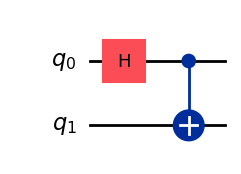

In [16]:
c = tc.Circuit(2)
c.h(0)
c.cx(0, 1)

# 计算期望值 <Z_0 Z_1>
# expectation_ps 方法用于计算泡利串的期望值
# z=[0, 1] 表示在第0位和第1位上都作用 Z 算符
exp_zz = c.expectation_ps(z=[0, 1])

print(f"线路的期望值 <Z_0 Z_1> 为: {exp_zz.numpy()}")
c.draw(output="mpl")

### 4-2 基于测量结果近似期望

利用 TensorCircuit API 对以上线路进行若干次测量，得到一些 0 1 的比特串的结果，并尝试利用这些测量的 bitstring 来估计期望 $\langle Z_0Z_1 \rangle$。

In [17]:
# --- 2. 进行多次测量 ---
# 设置测量次数（shots）
n_shots = 1024
# c.sample() 在设置 batch 参数时，默认返回一个整数张量，无需 format="int"
samples_raw = c.sample(batch=n_shots)

# 从原始样本中只提取测量结果（比特串）
# c.sample 可能返回 [(bitstring, weight), ...], 我们只取 bitstring
# 如果已经是纯比特串列表，这步操作也无害
samples_list = [s[0] if isinstance(s, tuple) else s for s in samples_raw]

# 将结果列表转换为 NumPy 数组
samples_numpy = np.array(samples_list)

# --- 3. 根据测量结果估计期望值 ---
# 计算每个测量结果对应的本征值
# 如果比特串中 1 的数量是偶数，本征值为 +1
# 如果比特串中 1 的数量是奇数，本征值为 -1
# 这等价于计算 (-1)^(b0 + b1)
eigenvalues = [(-1)**np.sum(s) for s in samples_numpy]

# 计算平均值，即为期望值的估计
estimated_expectation = np.mean(eigenvalues)

print(f"\n根据 {n_shots} 次测量结果估算的期望值 <Z_0 Z_1> 为: {estimated_expectation:.6f}")

# --- 对比理论值 ---
theoretical_expectation = c.expectation_ps(z=[0, 1])
print(f"理论计算的精确期望值为: {theoretical_expectation.numpy():.6f}")


根据 1024 次测量结果估算的期望值 <Z_0 Z_1> 为: 1.000000
理论计算的精确期望值为: 1.000000+0.000000j


### 4-3 测量不确定度

上一小问基于测量结果的期望估计和 4-1 的严格结果有一定差异，请分析这一差异随测量次数的标度规律。

##### Answer:

Actually, the results of the sampling is the same as the theoretical expectation value when the initial state is $\vert \Psi \rangle_{01}=\vert 00 \rangle$:
$$
\vert \psi \rangle_{01} = H_0\otimes CX_1 \vert \Psi \rangle_{01} = \frac{1}{\sqrt{2}}(\vert 00 \rangle_{01}+\vert 11 \rangle_{01}).
$$
It's obvious that $\vert \psi \rangle=\frac{1}{\sqrt{2}}(\vert 00 \rangle + \vert 11 \rangle)$ is the eigenstate of $Z_0Z_1$ with eigenvalue 1, thus the measurement outcome of $Z_0Z_1$ on state $\vert \psi \rangle$ is 1 with probability 1.

Consequently, the expectation value of $Z_0Z_1$ strictly equals to the measurement outcome all the time.

## OPT-1 选做 Grover Search

Grover search 是利用量子计算机来搜索无结构问题解的平方加速方案。

**注意：** 对于该线路，由于线路深度较深且存在多比特门，我们推荐以下设置来运行模拟。

**由于conda forge中不含有预编译版本的ray，这个cotengra和ray的包环境拼尽全力无法战胜。如果使用的是我提供的环境配置请不要运行下面这个单元格！**

In [ ]:
# import cotengra

# opt = cotengra.ReusableHyperOptimizer(
#     methods=["greedy", "kahypar"],
#     parallel="ray",
#     minimize="combo",
#     max_time=12,
#     max_repeats=1024,
#     progbar=True,
# )
# tc.set_contractor("custom", optimizer=opt, contraction_info=True, preprocessing=True)

### OPT-1-1 问题oracle

考虑一个 $3*2$ 的简单格子，每个方格需要填写 0 或 1，使得相邻方格的数字不同，构造该问题的量子线路 oracle，使得输入 6 位比特串，在满足条件时，目标比特输出 1，允许使用辅助比特。

测试输入态: |011001> (一个有效解)
Oracle 应用后，输出比特的 <Z> 期望值为: -1.0000
测试通过：Oracle 正确识别了有效解！


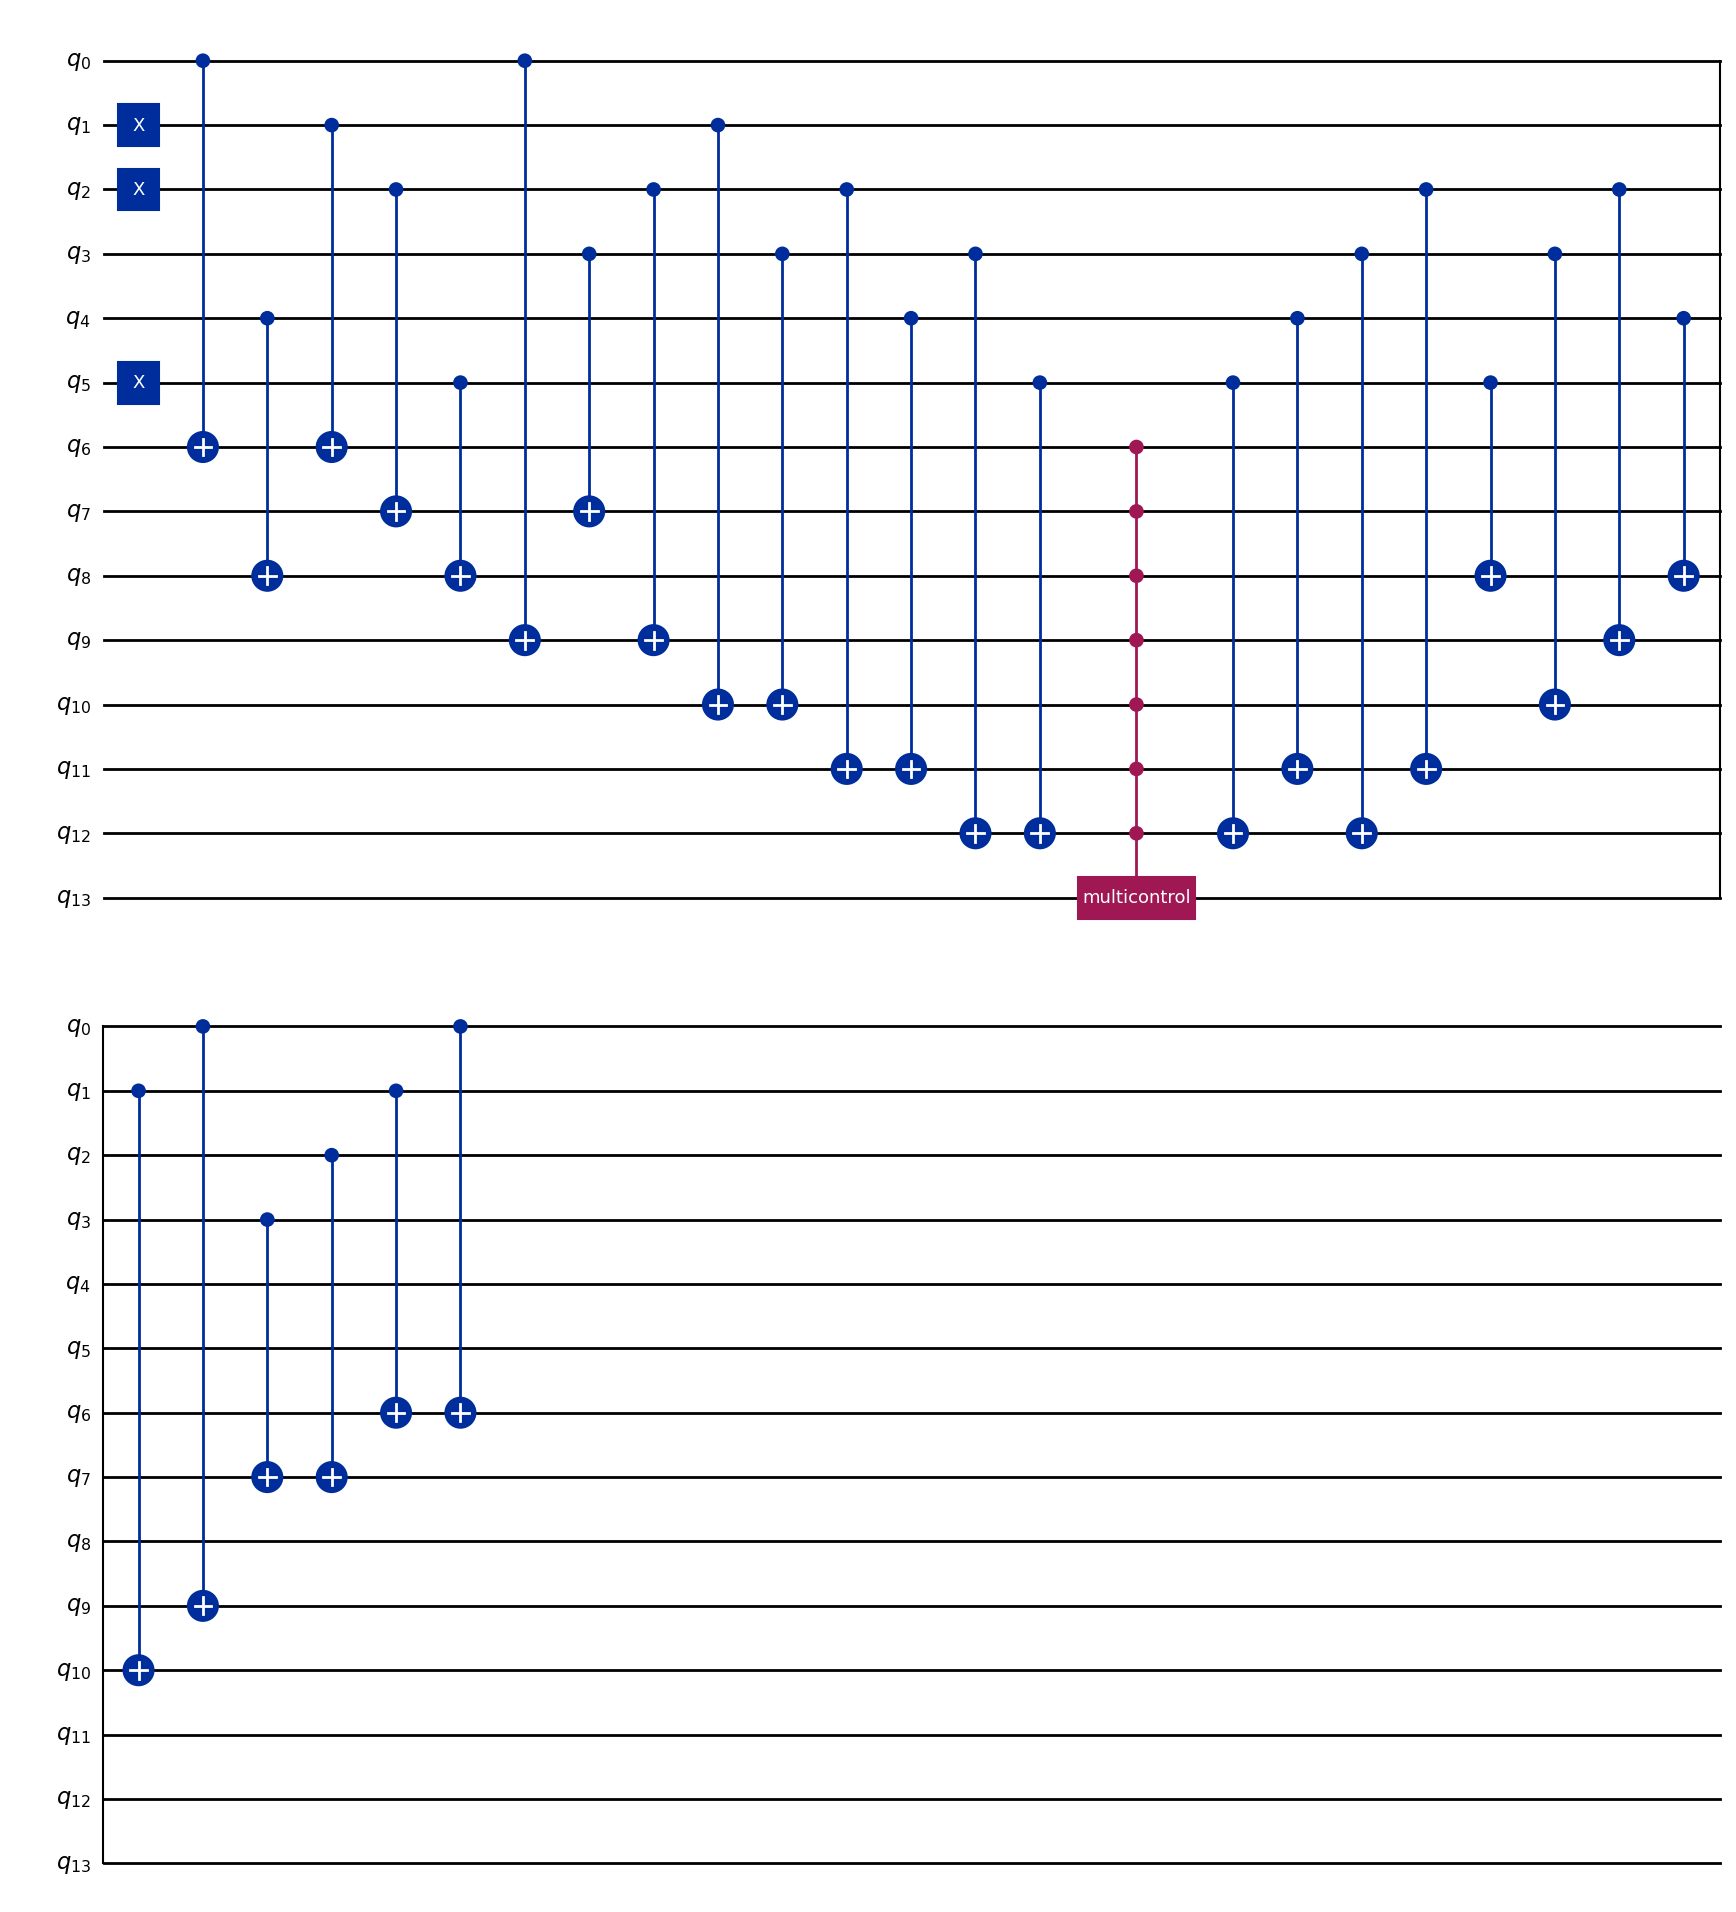

In [18]:
import tensorcircuit as tc
import numpy as np

def coloring_oracle(c: tc.Circuit, inputs: list[int], auxiliaries: list[int], output: int):
    """
    为 3x2 格子着色问题构建 Oracle。
    此版本使用手动分解的 MCT 门，该分解方法正确且稳健。

    :param c: 要添加门的 TensorCircuit 对象。
    :param inputs: 6个输入量子比特的索引列表。
    :param auxiliaries: 7个辅助量子比特的索引列表。
    :param output: 1个输出量子比特的索引。
    """
    # 定义邻接关系
    constraints = [
        (inputs[0], inputs[1]), (inputs[2], inputs[3]), (inputs[4], inputs[5]),
        (inputs[0], inputs[2]), (inputs[1], inputs[3]), (inputs[2], inputs[4]),
        (inputs[3], inputs[5]),
    ]

    # 1. 计算所有约束的结果到辅助比特上
    # 如果 q_x 和 q_y 颜色不同，auxiliaries[i] 翻转为 1。
    # 如果颜色相同，auxiliaries[i] 保持 0。
    # 我们寻找的是所有约束都满足，即所有辅助比特都为 1 的状态。
    for i, (q_x, q_y) in enumerate(constraints):
        c.cnot(q_x, auxiliaries[i])
        c.cnot(q_y, auxiliaries[i])

    # 创建一个 C7X 门的 QuOperator 对象
    # c7x_op = tc.gates.multicontrol_gate(unitary=tc.gates._x_matrix, ctrl=[1, 1, 1, 1, 1, 1, 1])
    c.multicontrol(*auxiliaries, output, ctrl=[1] * len(auxiliaries), unitary=tc.gates._x_matrix)
    # c7x_matrix = c7x_op.to_tensor()
    # c.any(*auxiliaries, output, unitary=c7x_matrix)

    # 3. 反计算：将约束检查部分的辅助比特恢复到初始状态
    # 必须以相反的顺序进行反计算
    for i, (q_x, q_y) in enumerate(reversed(constraints)):
        rev_i = len(constraints) - 1 - i
        c.cnot(q_y, auxiliaries[rev_i])
        c.cnot(q_x, auxiliaries[rev_i])

# --- 使用示例 ---

# 定义量子比特
# 6个输入 + 7个辅助 + 1个输出 = 14个量子比特
n_inputs = 6
n_auxiliaries = 7
n_output = 1
n_qubits = n_inputs + n_auxiliaries + n_output

input_qubits = list(range(n_inputs))
auxiliary_qubits = list(range(n_inputs, n_inputs + n_auxiliaries))
output_qubit = n_inputs + n_auxiliaries

# 准备一个测试输入
# 让我们测试一个已知的有效解: |010101>
# q0=1, q1=0, q2=1, q3=0, q4=1, q5=0
test_state_str = "011001"

# 创建线路
c = tc.Circuit(n_qubits)

# 1. 准备输入态
# 将测试态 |101010> 编码到输入比特上
for i, bit in enumerate(test_state_str):
    if bit == '1':
        c.x(i)

# 2. 应用 Oracle
coloring_oracle(c, input_qubits, auxiliary_qubits, output_qubit)

# 3. 检查结果

# 我们期望输出比特被翻转，所以测量 <Z> 的期望值应该是 -1
exp_val = c.expectation_ps(z=[output_qubit])

print(f"测试输入态: |{test_state_str}> (一个有效解)")
print(f"Oracle 应用后，输出比特的 <Z> 期望值为: {np.real(exp_val):.4f}")

if np.real(exp_val) == -1.0:
    print("测试通过：Oracle 正确识别了有效解！")
else:
    print("测试失败：Oracle 未能正确识别有效解。")

# 可视化 Oracle 电路
c.draw(output="mpl")

### OPT-1-2 Grover算法实现

根据以上问题 oracle ，实现 Grover 搜索线路，并根据公式给出合适的迭代次数进行测量。可视化不同迭代次数对测量得到正确结果概率的影响曲线。

总状态数 N = 64, 解的数量 M = 2
理论上最佳的迭代次数 k ≈ 4

通过状态演化计算不同迭代次数下的成功概率...
迭代 1 次: 成功概率 = 0.2583
迭代 2 次: 成功概率 = 0.6024
迭代 3 次: 成功概率 = 0.8969
迭代 4 次: 成功概率 = 0.9992
迭代 5 次: 成功概率 = 0.8596
迭代 6 次: 成功概率 = 0.5459
迭代 7 次: 成功概率 = 0.2099
迭代 8 次: 成功概率 = 0.0145
迭代 9 次: 成功概率 = 0.0542
迭代 10 次: 成功概率 = 0.3098
迭代 11 次: 成功概率 = 0.6576
迭代 12 次: 成功概率 = 0.9290
迭代 13 次: 成功概率 = 0.9927
迭代 14 次: 成功概率 = 0.8176
迭代 15 次: 成功概率 = 0.4888
迭代 16 次: 成功概率 = 0.1653
迭代 17 次: 成功概率 = 0.0040
迭代 18 次: 成功概率 = 0.0829
迭代 19 次: 成功概率 = 0.3639


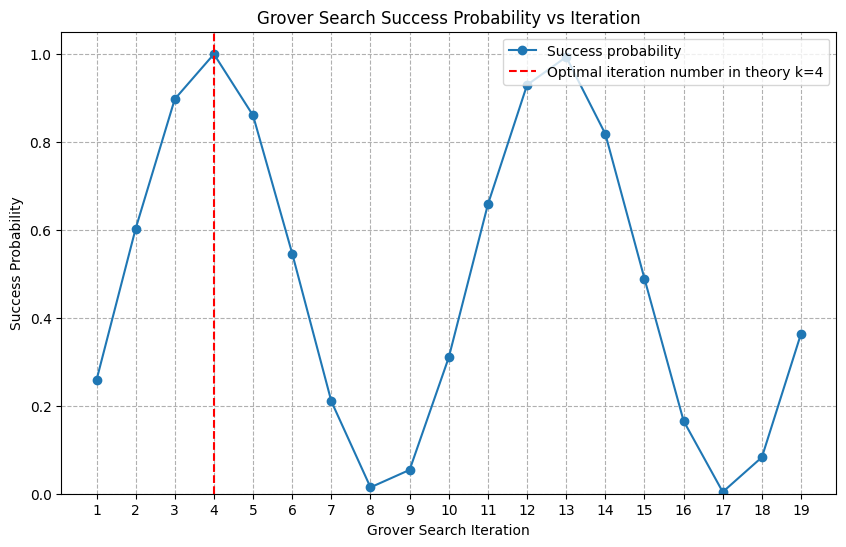

In [19]:
import numpy as np
import tensorcircuit as tc
import tensorflow as tf
import matplotlib.pyplot as plt
K = tc.set_backend("tensorflow")

# --- 1. 定义 Diffusion 算子 (代码不变) ---
def diffusion_operator(c: tc.Circuit, inputs: list[int]):
    """
    为 Grover 算法构建 Diffusion（扩散）算子。
    """
    for i in inputs:
        c.h(i)
    for i in inputs:
        c.x(i)
    c.h(inputs[-1])
    c.multicontrol(*inputs[:-1], inputs[-1], ctrl=[1] * (len(inputs) - 1), unitary=tc.gates._x_matrix)
    c.h(inputs[-1])
    for i in inputs:
        c.x(i)
    for i in inputs:
        c.h(i)

# --- 3. 计算并可视化 (基于状态演化的新方法) ---

# 问题分析 (代码不变)
iter_num = 20
N = 2**6
M = 2
optimal_k = int(np.round((np.pi / 4) * np.sqrt(N / M)))
print(f"总状态数 N = {N}, 解的数量 M = {M}")
print(f"理论上最佳的迭代次数 k ≈ {optimal_k}")

# 定义解和量子比特索引 (代码不变)
solution1_str = "011001"
solution2_str = "100110"
solution1_dec = int(solution1_str, 2)
solution2_dec = int(solution2_str, 2)

n_inputs = 6
n_auxiliaries = 7
n_output = 1
n_qubits = n_inputs + n_auxiliaries + n_output

input_qubits = list(range(n_inputs))
auxiliary_qubits = list(range(n_inputs, n_inputs + n_auxiliaries))
output_qubit = n_inputs + n_auxiliaries
qubits_to_trace_out = list(range(n_inputs, n_qubits))

# --- 新方法的核心实现 ---

# 1. 创建一个代表单次 Grover 迭代的线路 (U_Grover)
def grover_iteration_circuit(inputs, auxiliaries, output, current_state):
    c = tc.Circuit(n_qubits, inputs=current_state)
    coloring_oracle(c, inputs, auxiliaries, output)
    diffusion_operator(c, inputs)
    return c.state()

# 2. 创建初始状态 |ψ_0>
c_initial = tc.Circuit(n_qubits)
for i in input_qubits:
    c_initial.h(i)
c_initial.x(output_qubit)
c_initial.h(output_qubit)
initial_state = c_initial.state()

# 3. 准备迭代
# single_grover_iteration = grover_iteration_circuit(input_qubits, auxiliary_qubits, output_qubit)
current_state = initial_state
iterations_range = range(1, iter_num)
success_probabilities = []

# JIT 函数，用于从状态向量高效计算概率
@K.jit
def get_probs_from_state(state, trace_out_indices):
    rdm = tc.quantum.reduced_density_matrix(state, cut=trace_out_indices)
    diagonal = tf.linalg.diag_part(rdm)
    return K.real(diagonal)

print("\n通过状态演化计算不同迭代次数下的成功概率...")
for k in iterations_range:
    # 4. 将单次迭代算符作用于当前状态，得到新状态
    current_state = grover_iteration_circuit(input_qubits, auxiliary_qubits, output_qubit, current_state)

    # 5. 从新状态计算概率
    probs = get_probs_from_state(current_state, qubits_to_trace_out)
    
    prob = probs[solution1_dec] + probs[solution2_dec]
    success_probabilities.append(prob)
    print(f"迭代 {k} 次: 成功概率 = {prob:.4f}")

# --- 4. 绘图 (代码不变) ---
plt.figure(figsize=(10, 6))
plt.plot(list(iterations_range), success_probabilities, 'o-', label='Success probability')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal iteration number in theory k={optimal_k}')
plt.xlabel("Grover Search Iteration")
plt.ylabel("Success Probability")
plt.title("Grover Search Success Probability vs Iteration")
plt.xticks(list(iterations_range))
plt.grid(True, linestyle='--')
plt.legend()
plt.ylim(0, 1.05)
plt.show()

## OPT-2 选做 变分优化算法

### OPT-2-1 求解方程

实现基于 TensorCircuit jax 或 tf 后端的函数，给定输入 $a, b, c, d$ 输出 $ax^3+bx^2+cx+d=0$ 的解，要求基于变分优化梯度下降的方式。

/home/yixuanfu/anaconda3/envs/sparky/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


--- 三次方程求解器 ax^3 + bx^2 + cx + d = 0 ---
使用预设系数: a=1.0, b=-2.0, c=-5.0, d=6.0

尝试从初始点 x = 0.0 开始...
--- 求解方程: 1.0x^3 + -2.0x^2 + -5.0x + 6.0 = 0 ---


Solving Equation:   3%|▎         | 316/10000 [00:00<00:28, 337.67it/s, loss=1.51e-07, x=0.999940]



在步骤 317 达到收敛阈值。

--- 优化完成 ---
找到的解 x ≈ 0.99998528
验证: f(1.0000) = 8.815549e-05


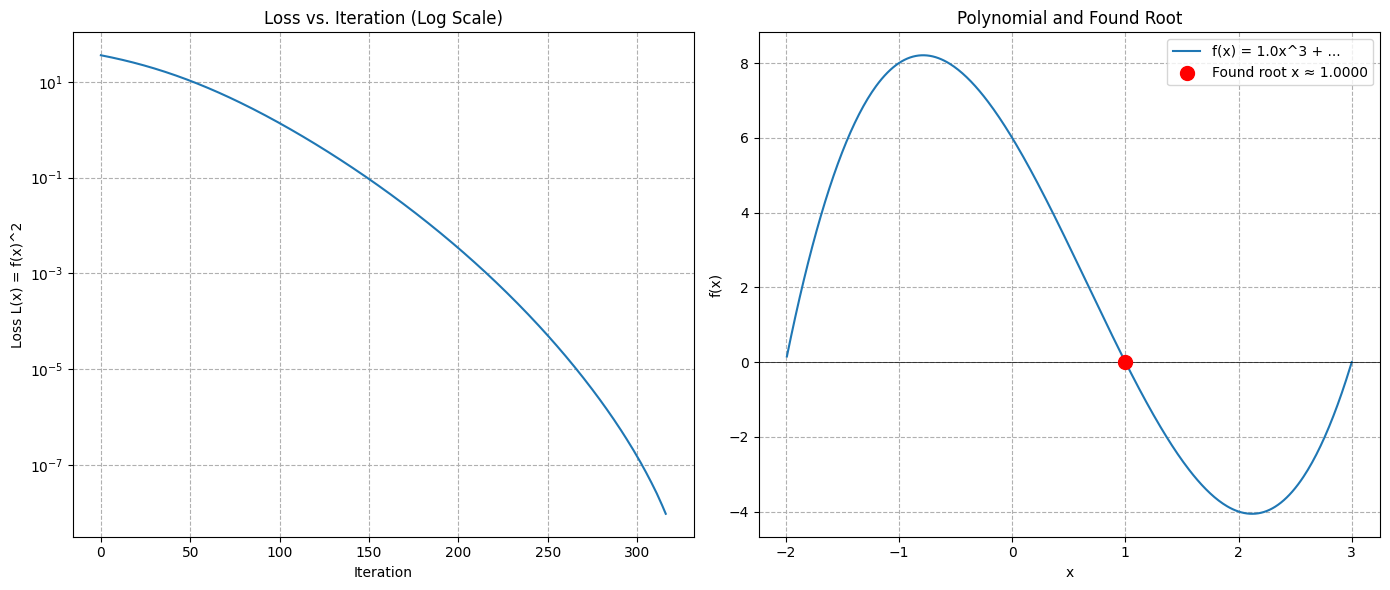


尝试从初始点 x = 2.5 开始...
--- 求解方程: 1.0x^3 + -2.0x^2 + -5.0x + 6.0 = 0 ---


Solving Equation:   2%|▏         | 150/10000 [00:00<00:31, 308.09it/s, loss=1.54e-03, x=2.996025]



在步骤 151 达到收敛阈值。

--- 优化完成 ---
找到的解 x ≈ 2.99995995
验证: f(3.0000) = -4.005320e-04


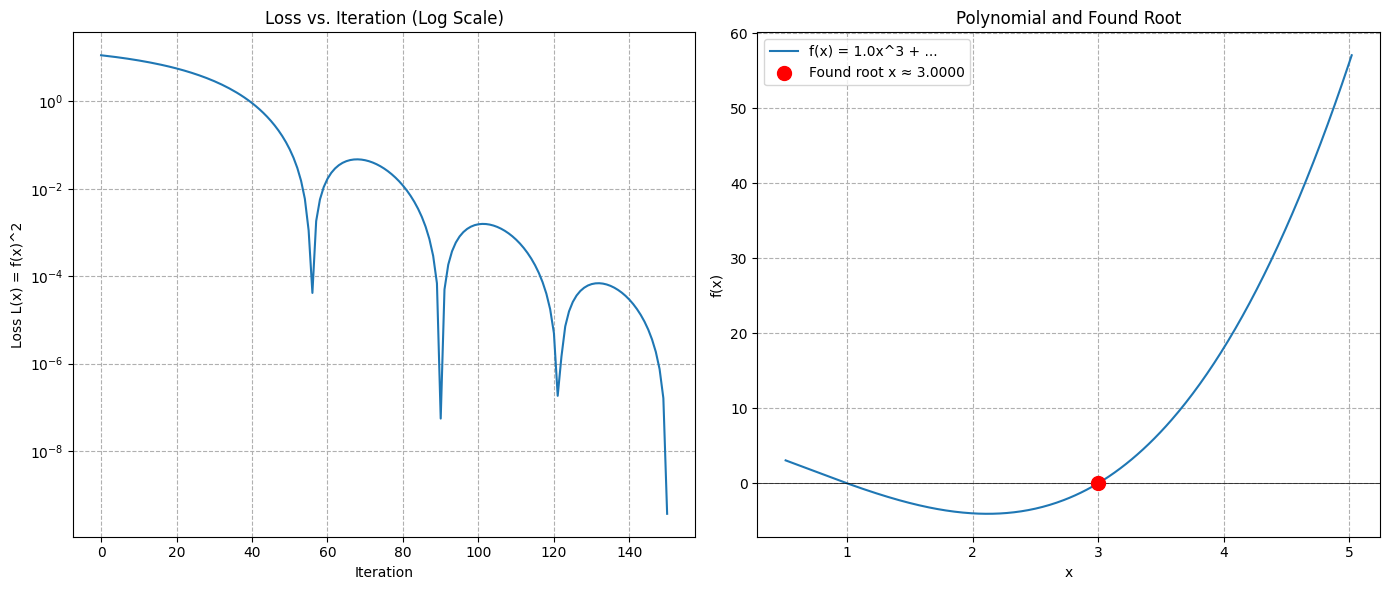


尝试从初始点 x = 5.0 开始...
--- 求解方程: 1.0x^3 + -2.0x^2 + -5.0x + 6.0 = 0 ---


Solving Equation:  38%|███▊      | 3814/10000 [00:10<00:17, 349.09it/s, loss=1.02e-08, x=3.000010]



在步骤 3815 达到收敛阈值。

--- 优化完成 ---
找到的解 x ≈ 3.00000978
验证: f(3.0000) = 9.799070e-05


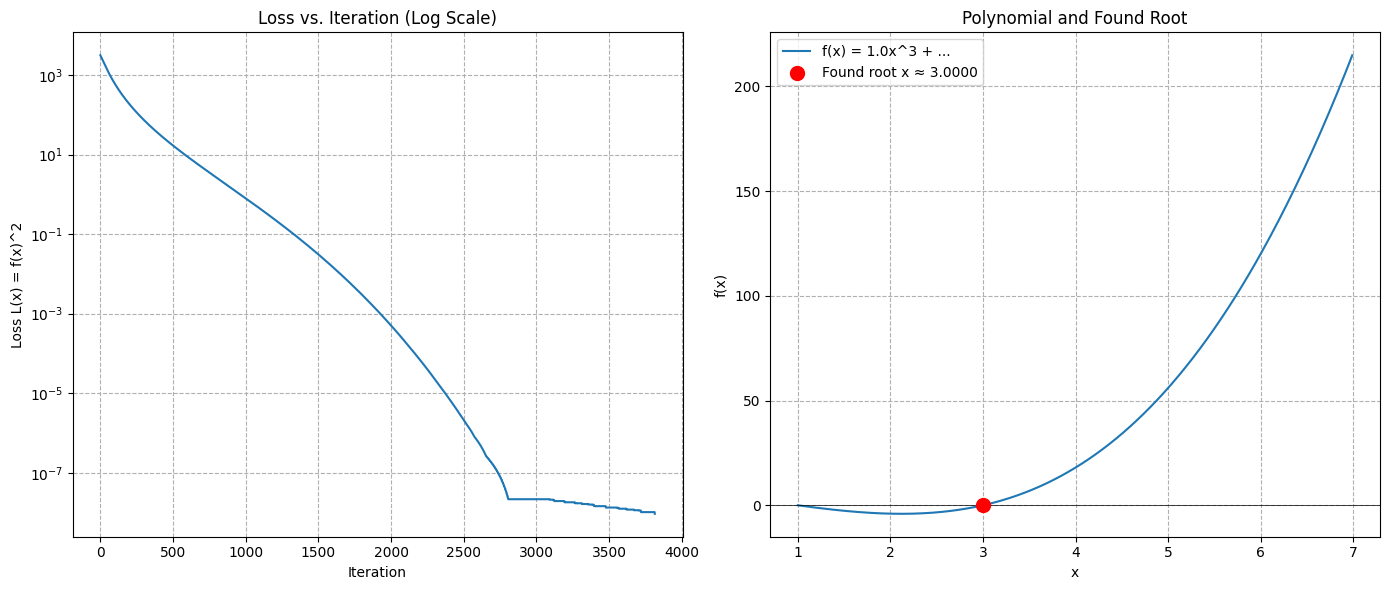


尝试从初始点 x = -5.0 开始...
--- 求解方程: 1.0x^3 + -2.0x^2 + -5.0x + 6.0 = 0 ---


Solving Equation:  65%|██████▍   | 6455/10000 [00:19<00:10, 332.85it/s, loss=1.00e-08, x=-2.000007]



在步骤 6456 达到收敛阈值。

--- 优化完成 ---
找到的解 x ≈ -2.00000644
验证: f(-2.0000) = -9.632144e-05


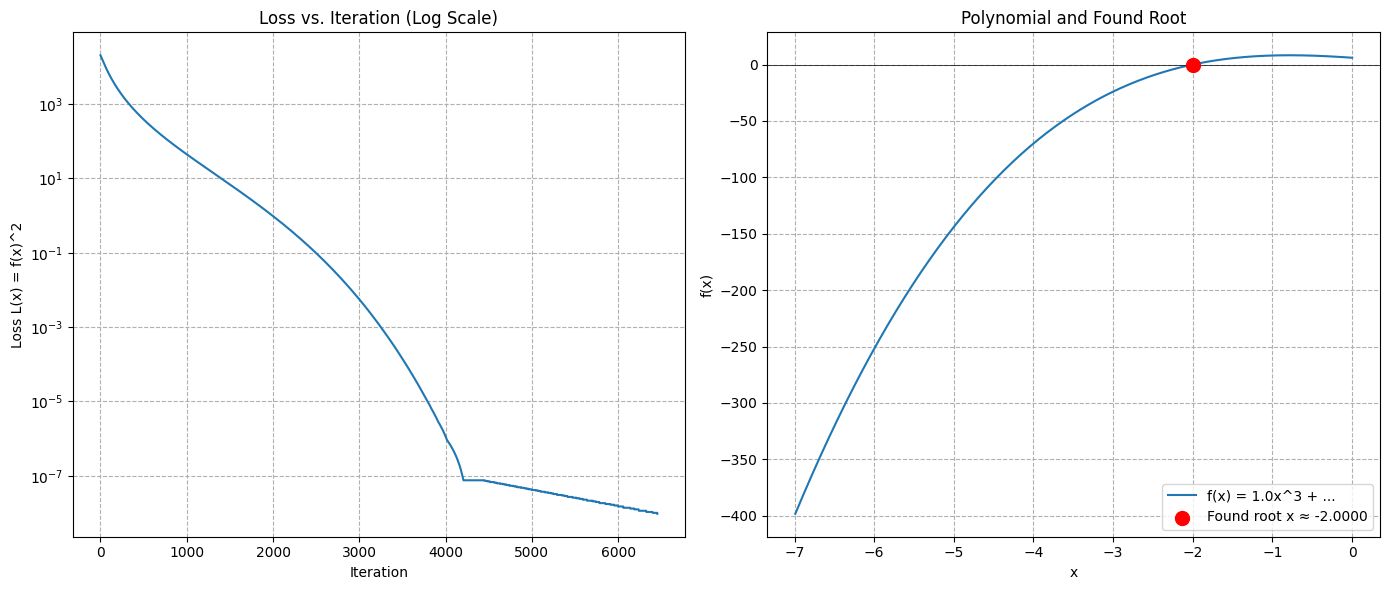


所有优化尝试完成。
找到的可能不重复的解为: [-2.0, 1.0, 3.0]


In [20]:
import tensorflow as tf
import numpy as np
import tensorcircuit as tc
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

# 确保后端是 tensorflow
K = tc.set_backend("tensorflow")

def solve_cubic_equation(a: float, b: float, c: float, d: float, 
                         initial_x: float = 0.0, 
                         learning_rate: float = 0.01, 
                         steps: int = 10000,
                         convergence_threshold: float = 1e-8):
    """
    使用梯度下降法求解三次方程 ax^3 + bx^2 + cx + d = 0。

    :param a, b, c, d: 方程的系数。
    :param initial_x: x 的初始猜测值。
    :param learning_rate: 梯度下降的学习率。
    :param steps: 优化的最大步数。
    :param convergence_threshold: 判断收敛的损失阈值。
    :return: 方程的一个解。
    """
    print(f"--- 求解方程: {a}x^3 + {b}x^2 + {c}x + {d} = 0 ---")
    
    # 将系数转换为 TensorFlow 常量
    a, b, c, d = [tf.convert_to_tensor(val, dtype=tf.float32) for val in [a, b, c, d]]
    
    # 将 x 定义为可训练的变量
    x = tf.Variable(initial_x, dtype=tf.float32)
    
    # 定义优化器
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    
    # 存储历史记录用于可视化
    history = {"x": [], "loss": []}

    # 优化循环
    with tqdm(range(steps), desc="Solving Equation") as pbar:
        for i in pbar:
            with tf.GradientTape() as tape:
                # 定义多项式 f(x)
                fx = a * x**3 + b * x**2 + c * x + d
                # 定义损失函数 L(x) = f(x)^2
                loss = fx**2
            
            # 计算梯度
            grads = tape.gradient(loss, [x])
            # 应用梯度更新 x
            optimizer.apply_gradients(zip(grads, [x]))
            
            # 记录历史
            history["x"].append(x.numpy())
            history["loss"].append(loss.numpy())
            
            # 打印进度并检查收敛
            if i % 100 == 0:
                pbar.set_postfix(x=f"{x.numpy():.6f}", loss=f"{loss.numpy():.2e}")
            
            if loss.numpy() < convergence_threshold:
                print(f"\n在步骤 {i+1} 达到收敛阈值。")
                break
            
    final_x = x.numpy()
    print("\n--- 优化完成 ---")
    print(f"找到的解 x ≈ {final_x:.8f}")
    # 验证解
    final_fx = a.numpy() * final_x**3 + b.numpy() * final_x**2 + c.numpy() * final_x + d.numpy()
    print(f"验证: f({final_x:.4f}) = {final_fx:.6e}")
    
    # --- Visualization ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # 1. Plot loss curve
    ax1.plot(history["loss"])
    ax1.set_yscale('log')
    ax1.set_title("Loss vs. Iteration (Log Scale)")
    ax1.set_xlabel("Iteration")
    ax1.set_ylabel("Loss L(x) = f(x)^2")
    ax1.grid(True, which="both", ls="--")
    
    # 2. Plot polynomial function and found root
    x_range = np.linspace(min(history["x"]) - 2, max(history["x"]) + 2, 400)
    y_range = a.numpy() * x_range**3 + b.numpy() * x_range**2 + c.numpy() * x_range + d.numpy()
    ax2.plot(x_range, y_range, label=f"f(x) = {a.numpy()}x^3 + ...")
    ax2.axhline(0, color='black', linewidth=0.5)
    ax2.scatter(final_x, final_fx, color='red', s=100, zorder=5, label=f'Found root x ≈ {final_x:.4f}')
    ax2.set_title("Polynomial and Found Root")
    ax2.set_xlabel("x")
    ax2.set_ylabel("f(x)")
    ax2.grid(True, ls="--")
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    return final_x

def run_solver_with_user_input():
    """
    主函数，用于获取用户输入并从多个起始点求解方程。
    """
    # 1. 在程序中写定一个x的起始点列表
    initial_points = [0.0, 2.5, 5.0, -5.0]
    
    # 新增：预先写定一个abcd的初始化列表
    default_coeffs = [1, -2, -5, 6]
    
    print("--- 三次方程求解器 ax^3 + bx^2 + cx + d = 0 ---")
    
    # 2. 检查预设列表，如果长度为4则使用，否则提示用户输入
    if len(default_coeffs) == 4:
        a, b, c, d = [float(val) for val in default_coeffs]
        print(f"使用预设系数: a={a}, b={b}, c={c}, d={d}")
    else:
        print("预设系数值无效，请手动输入。")
        while True:
            try:
                a_str = input("请输入系数 a: ")
                a = float(a_str)
                b_str = input("请输入系数 b: ")
                b = float(b_str)
                c_str = input("请输入系数 c: ")
                c = float(c_str)
                d_str = input("请输入系数 d: ")
                d = float(d_str)
                break
            except ValueError:
                print("输入无效，所有系数都必须是数字。请重试。")

    # 3. 遍历起始点列表，对每个起始点运行优化
    found_solutions = []
    for start_x in initial_points:
        print("\n" + "="*50)
        print(f"尝试从初始点 x = {start_x} 开始...")
        solution = solve_cubic_equation(a, b, c, d, initial_x=start_x)
        # 将找到的解四舍五入以避免浮点数精度问题导致的重复
        rounded_solution = round(solution, 4)
        if rounded_solution not in found_solutions:
            found_solutions.append(rounded_solution)

    print("\n" + "="*50)
    print("所有优化尝试完成。")
    print(f"找到的可能不重复的解为: {sorted(found_solutions)}")

# 运行主函数
run_solver_with_user_input()

### OPT-2-2 优化点

给定一组点 $(x_i, y_i)$，要求找到坐标系上到所有点的距离和最近的点的坐标并可视化，基于变分优化梯度下降的方式。（多村庄挖井）

--- 最优井位求解器 ---
使用预设的村庄坐标: [(0, 10), (12, 8), (5, -10), (-8, -6), (-10, 4)]
--- 开始寻找最优井位 ---
村庄位于: [(0, 10), (12, 8), (5, -10), (-8, -6), (-10, 4)]
初始猜测位置: (-0.2, 1.2)


Optimizing Well Location:   6%|▌         | 561/10000 [00:01<00:31, 304.47it/s, grad_norm=1.35e-05, loss=55.5942, pos=(-1.65, 1.81)]



在步骤 562 梯度足够小，达到收敛。

--- 优化完成 ---
找到的最优井位坐标: [-1.6471145  1.8093098]
到所有村庄的最小总距离: 55.5942


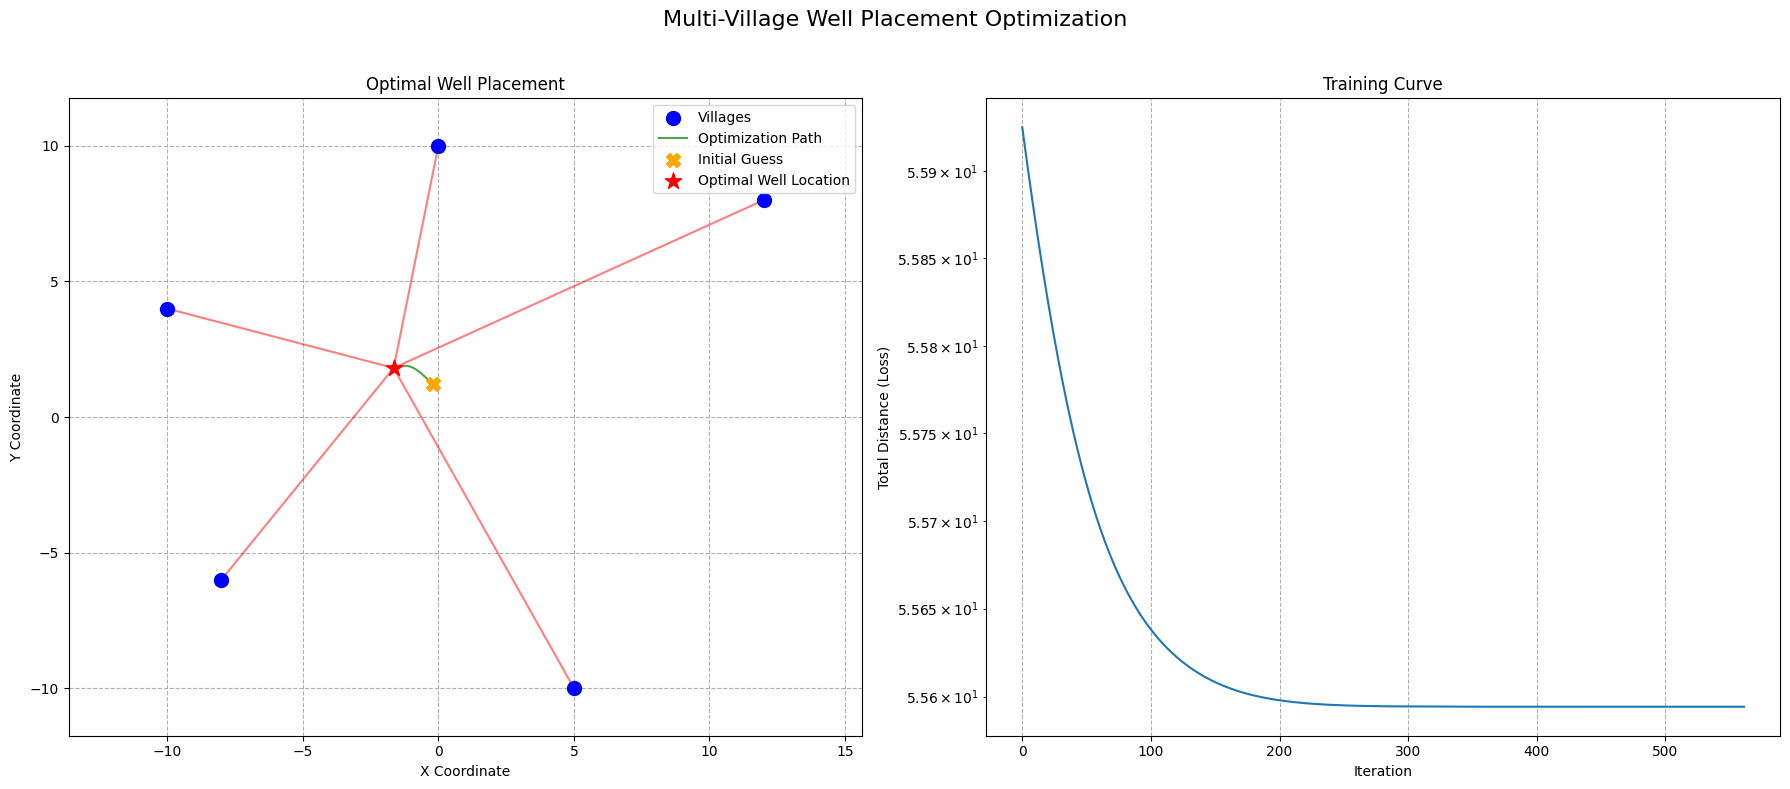

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorcircuit as tc
from tqdm.auto import tqdm

# 确保后端是 tensorflow
K = tc.set_backend("tensorflow")

def find_optimal_point(points: list[tuple[float, float]], 
                         initial_guess: tuple[float, float] = (0.0, 0.0),
                         learning_rate: float = 0.01, 
                         steps: int = 10000,
                         convergence_threshold: float = 1e-5):
    """
    使用梯度下降法找到到所有给定点的距离之和最小的点。

    :param points: 村庄坐标列表，例如 [(x1, y1), (x2, y2), ...]。
    :param initial_guess: 优化的起始点（第一口井的位置猜测）。
    :param learning_rate: 梯度下降的学习率。
    :param steps: 优化的最大步数。
    :param convergence_threshold: 判断收敛的梯度范数阈值。
    :return: 找到的最优点的坐标。
    """
    # 将村庄坐标转换为 TensorFlow 常量
    villages = K.convert_to_tensor(np.array(points, dtype=np.float32))
    
    # 将要优化的井的位置定义为可训练变量
    well_location = tf.Variable(initial_guess, dtype=tf.float32)
    
    # 定义优化器
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    
    # 存储历史记录用于可视化
    history = {"location": [], "loss": []}

    print(f"--- 开始寻找最优井位 ---")
    print(f"村庄位于: {points}")
    print(f"初始猜测位置: {initial_guess}")

    # 优化循环
    with tqdm(range(steps), desc="Optimizing Well Location") as pbar:
        for i in pbar:
            with tf.GradientTape() as tape:
                # 计算井到所有村庄的距离
                distances = K.sqrt(K.sum(tf.square(villages - well_location), axis=1))
                # 损失函数是所有距离的总和
                loss = K.sum(distances)
            
            # 计算梯度
            grads = tape.gradient(loss, [well_location])
            
            # 应用梯度更新井的位置
            optimizer.apply_gradients(zip(grads, [well_location]))
            
            # 记录历史
            history["location"].append(well_location.numpy())
            history["loss"].append(loss.numpy())
            
            # 打印进度并检查收敛
            grad_norm = tf.norm(grads[0])
            if i % 50 == 1:
                well_coords = well_location.numpy()
                pbar.set_postfix(loss=f"{loss.numpy():.4f}", grad_norm=f"{grad_norm:.2e}", pos=f"({well_coords[0]:.2f}, {well_coords[1]:.2f})")
            
            if grad_norm < convergence_threshold:
                print(f"\n在步骤 {i+1} 梯度足够小，达到收敛。")
                break
            
    final_location = well_location.numpy()
    print("\n--- 优化完成 ---")
    print(f"找到的最优井位坐标: {final_location}")
    print(f"到所有村庄的最小总距离: {loss.numpy():.4f}")
    
    # --- Visualization ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    # Plot 1: Geometric Visualization
    village_coords = np.array(points)
    ax1.scatter(village_coords[:, 0], village_coords[:, 1], c='blue', s=100, label='Villages', zorder=5)
    path = np.array(history["location"])
    ax1.plot(path[:, 0], path[:, 1], 'g-', label='Optimization Path', markersize=3, alpha=0.7)
    ax1.scatter(initial_guess[0], initial_guess[1], c='orange', s=100, marker='X', label='Initial Guess', zorder=6)
    ax1.scatter(final_location[0], final_location[1], c='red', s=150, marker='*', label='Optimal Well Location', zorder=6)
    for v in village_coords:
        ax1.plot([final_location[0], v[0]], [final_location[1], v[1]], 'r-', alpha=0.5)
    ax1.set_title("Optimal Well Placement")
    ax1.set_xlabel("X Coordinate")
    ax1.set_ylabel("Y Coordinate")
    ax1.legend()
    ax1.grid(True, linestyle='--')
    ax1.axis('equal')

    # Plot 2: Training Curve
    ax2.plot(history["loss"])
    ax2.set_title("Training Curve")
    ax2.set_xlabel("Iteration")
    ax2.set_ylabel("Total Distance (Loss)")
    ax2.grid(True, linestyle='--')
    ax2.set_yscale('log') # Use log scale for better visibility
    
    plt.suptitle("Multi-Village Well Placement Optimization", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
    return final_location

def run_well_finder():
    """
    主函数，用于设置村庄点并运行优化。
    """
    # 在程序中写定一个样例点组列表
    # 如果列表为空 (e.g., default_points = [])，则会提示用户输入
    default_points = [
        (0, 10), 
        (12, 8),
        (5, -10), 
        (-8, -6), 
        (-10, 4)
    ]
    
    print("--- 最优井位求解器 ---")
    
    points_to_use = []
    
    if default_points:
        print(f"使用预设的村庄坐标: {default_points}")
        points_to_use = default_points
    else:
        print("预设列表为空，请手动输入村庄坐标。")
        print("每个坐标用逗号分隔 (例如 'x,y')，输入 'done' 结束。")
        while True:
            try:
                user_input = input(f"请输入第 {len(points_to_use) + 1} 个村庄的坐标: ")
                if user_input.lower() == 'done':
                    if len(points_to_use) < 2:
                        print("至少需要两个村庄。")
                        continue
                    break
                x_str, y_str = user_input.split(',')
                x, y = float(x_str), float(y_str)
                points_to_use.append((x, y))
            except ValueError:
                print("输入格式错误，请输入 'x,y' 格式的数字坐标。")
            except Exception as e:
                print(f"发生错误: {e}")
    
    # 使用所有村庄的平均位置作为初始猜测点
    if points_to_use:
        initial_guess = np.mean(np.array(points_to_use), axis=0)
        find_optimal_point(points_to_use, initial_guess=tuple(initial_guess))
    else:
        print("没有村庄坐标，程序退出。")

# 运行主函数
run_well_finder()

### OPT-2-3 优化线

给定一组点 $(x_i, y_i)$，要求找到坐标系上的一条直线到所有点的距离和最小，基于变分优化梯度下降的方式。（多村庄通公路）

--- Optimal Road Placement Solver ---
Using the default set of points: [(1, 5), (2, 3), (3, 4), (4, 2), (5, 3.5), (6, 1), (7, 2.5), (8, -0.5)]
--- Starting to find the optimal line ---
Points are at: [(1, 5), (2, 3), (3, 4), (4, 2), (5, 3.5), (6, 1), (7, 2.5), (8, -0.5)]
Initial guess: m=0.0, c=2.5625


Optimizing Line: 100%|██████████| 10000/10000 [01:09<00:00, 144.69it/s, c=5.786, loss=4.9988, m=-0.786]



--- Optimization Finished ---
Found optimal line: y = -0.7857x + 5.7857
Minimum sum of distances: 4.9987


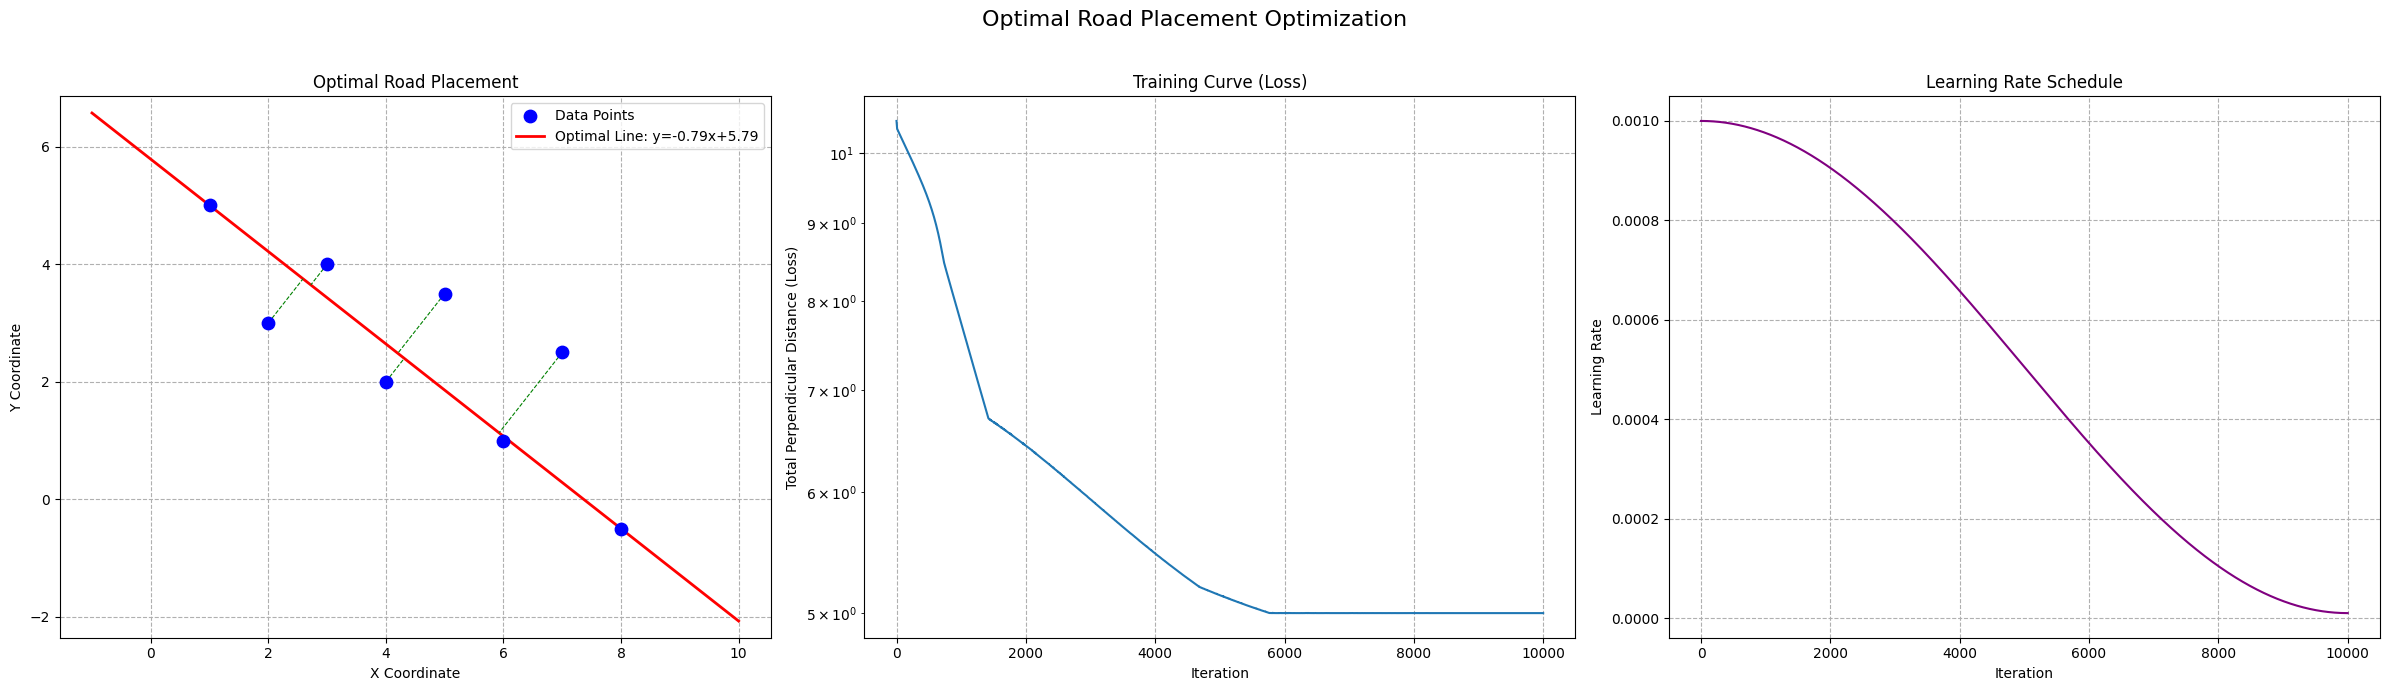

In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorcircuit as tc
from tqdm.auto import tqdm

# 确保后端是 tensorflow
K = tc.set_backend("tensorflow")

def find_optimal_line(points: list[tuple[float, float]], 
                        initial_m: float = 0.0,
                        initial_c: float = 0.0,
                        learning_rate: float = 0.001, 
                        steps: int = 10000,
                        convergence_threshold: float = 1e-6):
    """
    Finds the line y=mx+c that minimizes the sum of perpendicular distances to all points.

    :param points: A list of point coordinates, e.g., [(x1, y1), (x2, y2), ...].
    :param initial_m: Initial guess for the slope (m).
    :param initial_c: Initial guess for the intercept (c).
    :param learning_rate: Learning rate for the gradient descent.
    :param steps: Maximum number of optimization steps.
    :param convergence_threshold: Gradient norm threshold to determine convergence.
    :return: A tuple (m, c) of the optimal line parameters.
    """
    points_tensor = tf.constant(np.array(points), dtype=tf.float32)
    x_coords = points_tensor[:, 0]
    y_coords = points_tensor[:, 1]
    
    # Define trainable variables for the line: y = m*x + c
    m = tf.Variable(initial_m, dtype=tf.float32)
    c = tf.Variable(initial_c, dtype=tf.float32)
    
    # Cosine decay learning rate schedule
    lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
        initial_learning_rate=learning_rate,
        decay_steps=steps,
        alpha=0.01 # end_learning_rate will be learning_rate * alpha
    )
    
    optimizer = tf.keras.optimizers.Adam(lr_schedule)
    
    history = {"params": [], "loss": [], "lr": []}

    print(f"--- Starting to find the optimal line ---")
    print(f"Points are at: {points}")
    print(f"Initial guess: m={initial_m}, c={initial_c}")

    # 使用 tqdm 包装循环以显示进度条
    with tqdm(range(steps), desc="Optimizing Line") as pbar:
        for i in pbar:
            with tf.GradientTape() as tape:
                # Perpendicular distance from (xi, yi) to y - mx - c = 0 is |yi - m*xi - c| / sqrt(m^2 + 1)
                numerator = tf.abs(y_coords - m * x_coords - c)
                denominator = tf.sqrt(m**2 + 1)
                distances = numerator / denominator
                loss = tf.reduce_sum(distances)
            
            grads = tape.gradient(loss, [m, c])
            optimizer.apply_gradients(zip(grads, [m, c]))
            
            history["params"].append((m.numpy(), c.numpy()))
            history["loss"].append(loss.numpy())
            history["lr"].append(lr_schedule(i)) # 记录当前学习率
            
            # 在进度条上更新参数和损失信息
            if i % 100 == 1:
                pbar.set_postfix(m=f"{m.numpy():.3f}", c=f"{c.numpy():.3f}", loss=f"{loss.numpy():.4f}")
            
            grad_norm = tf.norm(tf.stack(grads))
            
            if grad_norm < convergence_threshold:
                print(f"\nConverged at step {i+1} as gradient norm is small enough.")
                break
            
    final_m, final_c = m.numpy(), c.numpy()
    print("\n--- Optimization Finished ---")
    print(f"Found optimal line: y = {final_m:.4f}x + {final_c:.4f}")
    print(f"Minimum sum of distances: {loss.numpy():.4f}")
    
    # --- Visualization ---
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 7))
    
    # Plot 1: Geometric Visualization
    point_coords = np.array(points)
    ax1.scatter(point_coords[:, 0], point_coords[:, 1], c='blue', s=80, label='Data Points', zorder=5)
    
    # Plot the final line
    x_min, x_max = np.min(point_coords[:, 0]), np.max(point_coords[:, 0])
    x_range = np.linspace(x_min - 2, x_max + 2, 100)
    y_range = final_m * x_range + final_c
    ax1.plot(x_range, y_range, 'r-', linewidth=2, label=f'Optimal Line: y={final_m:.2f}x+{final_c:.2f}')
    
    # Plot perpendicular lines from points to the optimal line
    for x_i, y_i in point_coords:
        # Projection point on the line
        x_proj = (x_i + final_m * y_i - final_m * final_c) / (final_m**2 + 1)
        y_proj = final_m * x_proj + final_c
        ax1.plot([x_i, x_proj], [y_i, y_proj], 'g--', linewidth=0.8)
        
    ax1.set_title("Optimal Road Placement")
    ax1.set_xlabel("X Coordinate")
    ax1.set_ylabel("Y Coordinate")
    ax1.legend()
    ax1.grid(True, linestyle='--')
    ax1.axis('equal')

    # Plot 2: Training Curve
    ax2.plot(history["loss"])
    ax2.set_title("Training Curve (Loss)")
    ax2.set_xlabel("Iteration")
    ax2.set_ylabel("Total Perpendicular Distance (Loss)")
    ax2.grid(True, linestyle='--')
    ax2.set_yscale('log') # Use log scale for better visibility
    
    # Plot 3: Learning Rate Schedule
    ax3.plot(history["lr"], color='purple')
    ax3.set_title("Learning Rate Schedule")
    ax3.set_xlabel("Iteration")
    ax3.set_ylabel("Learning Rate")
    ax3.grid(True, linestyle='--')
    
    plt.suptitle("Optimal Road Placement Optimization", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
    return final_m, final_c

def run_road_builder():
    """
    Main function to set up points and run the optimization.
    """
    # A default list of points. If empty, the user will be prompted for input.
    default_points = [
        (1, 5), (2, 3), (3, 4), 
        (4, 2), (5, 3.5), (6, 1),
        (7, 2.5), (8, -0.5)
    ]
    
    print("--- Optimal Road Placement Solver ---")
    
    points_to_use = []
    
    if default_points:
        print(f"Using the default set of points: {default_points}")
        points_to_use = default_points
    else:
        print("Default point list is empty. Please enter point coordinates manually.")
        print("Enter coordinates separated by a comma (e.g., 'x,y'). Type 'done' to finish.")
        while True:
            try:
                user_input = input(f"Enter coordinates for point #{len(points_to_use) + 1}: ")
                if user_input.lower() == 'done':
                    if len(points_to_use) < 2:
                        print("At least two points are required.")
                        continue
                    break
                x_str, y_str = user_input.split(',')
                x, y = float(x_str), float(y_str)
                points_to_use.append((x, y))
            except ValueError:
                print("Invalid format. Please enter coordinates as 'x,y'.")
            except Exception as e:
                print(f"An error occurred: {e}")
    
    if points_to_use:
        # Use the mean of points to initialize 'c' for a better start
        points_array = np.array(points_to_use)
        initial_c_guess = np.mean(points_array[:, 1])
        find_optimal_line(points_to_use, initial_c=initial_c_guess)
    else:
        print("No points were provided. Exiting program.")

# Run the main function
run_road_builder()